___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras. 

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Logistic Regression***, ***Random Forest Classifier***, ***XGBoost Classifier***, ***ANN***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Distance Based and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data
- Built XGBoost Classifier, Evaluate Model Performance and Predict Test Data
- Built ANN Classifier, Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Best Model
- Save and Export Variables
- Deploy best model via Streamlit

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [279]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "notebook"

#To display the plots
# %matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, plot_confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score, PrecisionRecallDisplay, plot_precision_recall_curve

from sklearn.cluster import KMeans
from pyclustertend import hopkins

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix, PrecisionRecallCurve
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.pipeline import Pipeline

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid", {'axes.grid' : False})

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 200)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [2]:
df = pd.read_csv("HR_Dataset.csv")

In [3]:
df_copy = df.copy()

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Moreover, you can find the average of both the groups using groupby() and mean() function.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3        sales     low  
4        sales     low

In [6]:
df.tail()

satisfaction_level  last_evaluation  number_project  \
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Departments  salary  
14994                      0      support    low  
14995                      0      support    low  
14996                      0      support    low  
14997                      0      support    low  
14998                      0      support    low

In [7]:
df.sample(20)

satisfaction_level  last_evaluation  number_project  \
11469                0.91             0.80               5   
13864                0.65             0.82               5   
11365                0.75             0.59               5   
9624                 0.58             0.57               5   
48                   0.40             0.54               2   
1108                 0.10             0.91               7   
5166                 0.79             0.90               3   
4987                 0.59             0.62               3   
5730                 0.90             0.62               3   
2691                 0.66             0.48               3   
7931                 0.42             0.48               5   
1326                 0.10             0.77               6   
3074                 0.21             0.81               4   
3330                 0.82             0.99               3   
11869                0.53             0.77               2   
6724                 0.33             0.85               2   
11312                0.80             0.96               3   
5368                 0.87             0.68               4   
10490                0.50             0.70               4   
11074                0.90             0.93               3   

       average_montly_hours  time_spend_company  Work_accident  left  \
11469                   169                   4              0     0   
13864                   265                   3              0     0   
11365                   149                   4              0     0   
9624                    205                   2              0     0   
48                      148                   3              0     1   
1108                    297                   4              0     1   
5166                    152                   4              0     0   
4987                    219                   3              0     0   
5730                    233                   5              1     0   
2691                    192                   3              1     0   
7931                    191                   5              0     0   
1326                    272                   4              0     1   
3074                    144                   4              0     0   
3330                    195                   2              0     0   
11869                   167                   2              0     0   
6724                    127                   3              0     0   
11312                   161                   3              0     0   
5368                    217                   3              0     0   
10490                   135                   3              0     0   
11074                   209                   3              0     0   

       promotion_last_5years Departments   salary  
11469                      0        sales     low  
13864                      0           IT     low  
11365                      0        sales  medium  
9624                       0    marketing    high  
48                         0      support     low  
1108                       0    technical     low  
5166                       0      support  medium  
4987                       0        sales     low  
5730                       0    technical     low  
2691                       0        sales     low  
7931                       0        RandD  medium  
1326                       0   accounting     low  
3074                       0        sales  medium  
3330                       0      support    high  
11869                      0      support  medium  
6724                       0    marketing  medium  
11312                      0    technical     low  
5368                       0        sales  medium  
10490                      0           hr     low  
11074                      0  product_mng  medium

In [8]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [9]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Departments               10
salary                     3
dtype: int64

In [10]:
def first_look(col):
    print('column name : ', col)
    print('--------------------------------')
    print('Percent_of_Nulls   : ', '%', round(df[col].isnull().sum() / df.shape[0]*100, 2))
    print('Number_of_Nulls   : ', df[col].isnull().sum())
    print('Number_of_Uniques : ', df[col].nunique())
    print()
    print(f"Value_counts of {col} column:\n", "--"*20,"\n", df[col].value_counts(dropna = False).head(10))
    print()
    if df[col].dtypes == "O" :
        print(f"Value_counts of {col} column with sort_index : \n", "--"*20,"\n", df[col].value_counts(dropna = False).sort_index(key = lambda x : x.str.lower()).head(10))
    else :
        print(f"Value_counts of {col} column with sort_index : \n", "--"*20,"\n", df[col].value_counts(dropna = False).sort_index().head(10))
    print()

In [11]:
for col in df.columns :
    first_look(col)

column name :  satisfaction_level
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  92

Value_counts of satisfaction_level column:
 ---------------------------------------- 
 0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
0.73    246
0.78    241
0.37    241
0.82    241
0.89    237
Name: satisfaction_level, dtype: int64

Value_counts of satisfaction_level column with sort_index : 
 ---------------------------------------- 
 0.09    195
0.10    358
0.11    335
0.12     30
0.13     54
0.14     73
0.15     76
0.16     79
0.17     72
0.18     63
Name: satisfaction_level, dtype: int64

column name :  last_evaluation
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  65

Value_counts of last_evaluation column:
 ---------------------------------------- 
 0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
0.49    332
0.87    326
0.53    324
0.56    322
0.85    316
N

In [12]:
# descriptive statistics for numeric columns

df.describe().T

count   mean   std   min    25%    50%    75%    max
satisfaction_level    14999.00   0.61  0.25  0.09   0.44   0.64   0.82   1.00
last_evaluation       14999.00   0.72  0.17  0.36   0.56   0.72   0.87   1.00
number_project        14999.00   3.80  1.23  2.00   3.00   4.00   5.00   7.00
average_montly_hours  14999.00 201.05 49.94 96.00 156.00 200.00 245.00 310.00
time_spend_company    14999.00   3.50  1.46  2.00   3.00   3.00   4.00  10.00
Work_accident         14999.00   0.14  0.35  0.00   0.00   0.00   0.00   1.00
left                  14999.00   0.24  0.43  0.00   0.00   0.00   0.00   1.00
promotion_last_5years 14999.00   0.02  0.14  0.00   0.00   0.00   0.00   1.00

In [13]:
# descriptive statistics for categorical columns

df.describe(include="O").T

count unique    top  freq
Departments   14999     10  sales  4140
salary        14999      3    low  7316

In [14]:
df.groupby("left").describe()

satisfaction_level                                    last_evaluation  \
                  count mean  std  min  25%  50%  75%  max           count   
left                                                                         
0              11428.00 0.67 0.22 0.12 0.54 0.69 0.84 1.00        11428.00   
1               3571.00 0.44 0.26 0.09 0.13 0.41 0.73 0.92         3571.00   

                                        number_project                      \
     mean  std  min  25%  50%  75%  max          count mean  std  min  25%   
left                                                                         
0    0.72 0.16 0.36 0.58 0.71 0.85 1.00       11428.00 3.79 0.98 2.00 3.00   
1    0.72 0.20 0.45 0.52 0.79 0.90 1.00        3571.00 3.86 1.82 2.00 2.00   

                    average_montly_hours                                    \
      50%  75%  max                count   mean   std    min    25%    50%   
left                                                                         
0    4.00 4.00 6.00             11428.00 199.06 45.68  96.00 162.00 198.00   
1    4.00 6.00 7.00              3571.00 207.42 61.20 126.00 146.00 224.00   

                   time_spend_company                                      \
        75%    max              count mean  std  min  25%  50%  75%   max   
left                                                                        
0    238.00 287.00           11428.00 3.38 1.56 2.00 2.00 3.00 4.00 10.00   
1    262.00 310.00            3571.00 3.88 0.98 2.00 3.00 4.00 5.00  6.00   

     Work_accident                                    promotion_last_5years  \
             count mean  std  min  25%  50%  75%  max                 count   
left                                                                          
0         11428.00 0.18 0.38 0.00 0.00 0.00 0.00 1.00              11428.00   
1          3571.00 0.05 0.21 0.00 0.00 0.00 0.00 1.00               3571.00   

                                         
     mean  std  min  25%  50%  75%  max  
left                                     
0    0.03 0.16 0.00 0.00 0.00 0.00 1.00  
1    0.01 0.07 0.00 0.00 0.00 0.00 1.00

In [15]:
df.groupby("left").describe(include="O")

Departments                      salary                  
            count unique    top  freq  count unique  top  freq
left                                                          
0           11428     10  sales  3126  11428      3  low  5144
1            3571     10  sales  1014   3571      3  low  2172

In [16]:
# checking duplicates

df.duplicated().sum()

3008

In [17]:
# checking the percentage of duplicates in df

df.duplicated().sum()/df.shape[0]

0.2005467031135409

In [18]:
# dropping duplicates

df = df.drop_duplicates().reset_index(drop=True)

In [19]:
df.shape

(11991, 10)

In [20]:
# cleaning column names

from skimpy import clean_columns
df = clean_columns(df)
df.columns

2 column names have been cleaned

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [21]:
# changing the position of "left" column in df

df = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 
       'promotion_last_5years', 'departments', 'salary','left']]

In [22]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count            11991.00         11991.00        11991.00   
mean                 0.63             0.72            3.80   
std                  0.24             0.17            1.16   
min                  0.09             0.36            2.00   
25%                  0.48             0.57            3.00   
50%                  0.66             0.72            4.00   
75%                  0.82             0.86            5.00   
max                  1.00             1.00            7.00   

       average_montly_hours  time_spend_company  work_accident  \
count              11991.00            11991.00       11991.00   
mean                 200.47                3.36           0.15   
std                   48.73                1.33           0.36   
min                   96.00                2.00           0.00   
25%                  157.00                3.00           0.00   
50%                  200.00                3.00           0.00   
75%                  243.00                4.00           0.00   
max                  310.00               10.00           1.00   

       promotion_last_5years     left  
count               11991.00 11991.00  
mean                    0.02     0.17  
std                     0.13     0.37  
min                     0.00     0.00  
25%                     0.00     0.00  
50%                     0.00     0.00  
75%                     0.00     0.00  
max                     1.00     1.00

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

*Feel free to add more visualization

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

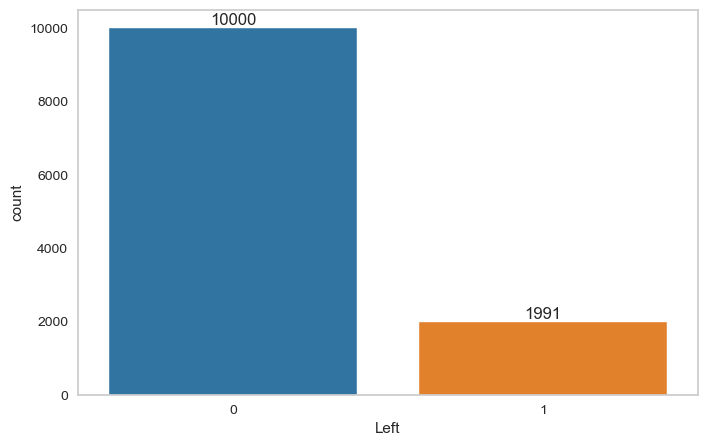

In [23]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="left", data=df, palette="tab10")
plt.xlabel("Left")
ax.bar_label(ax.containers[0]);

In [24]:
df.left.value_counts(normalize=True)

0   0.83
1   0.17
Name: left, dtype: float64

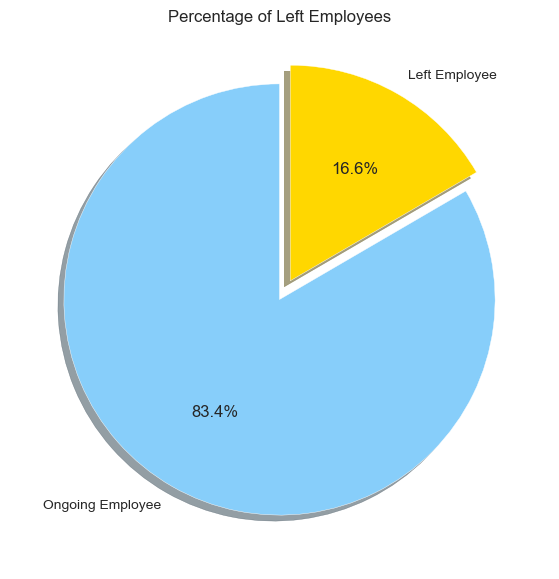

In [25]:
# Percentage of Employees based on the "left" feature

fig = plt.figure(figsize =(10, 7))
plt.pie(df.left.value_counts(normalize=True), 
        labels = ["Ongoing Employee","Left Employee"], explode = (0, 0.1),autopct='%1.1f%%',shadow=True, startangle=90,
        colors=['LightSkyBlue', 'gold'])
plt.title("Percentage of Left Employees")
plt.show()

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

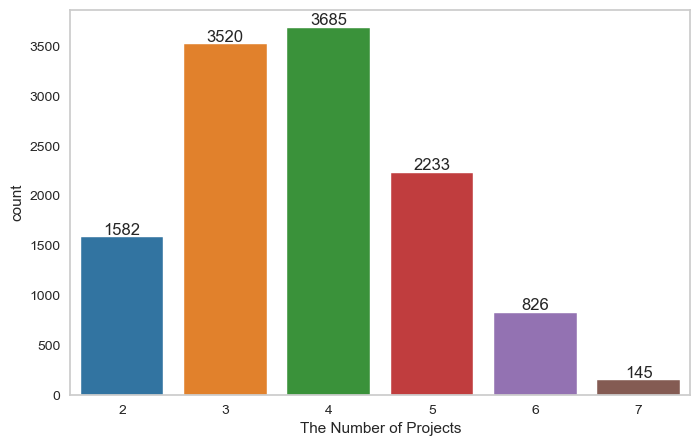

In [26]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="number_project", data=df, palette="tab10")
plt.xlabel("The Number of Projects")
ax.bar_label(ax.containers[0]);

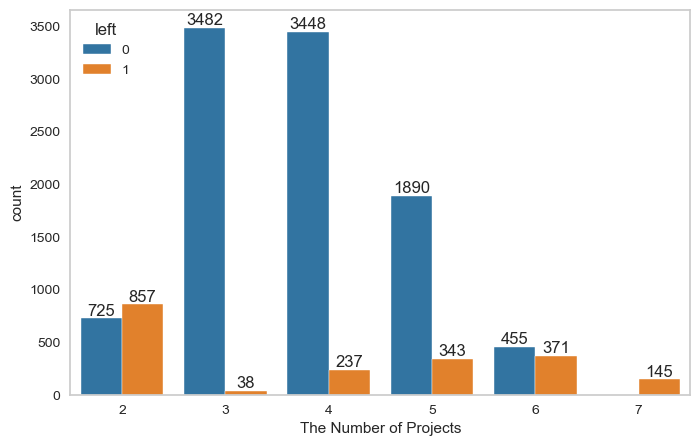

In [27]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="number_project", hue = "left", data=df, palette="tab10")
plt.xlabel("The Number of Projects")
for i in ax.containers:
    ax.bar_label(i);

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


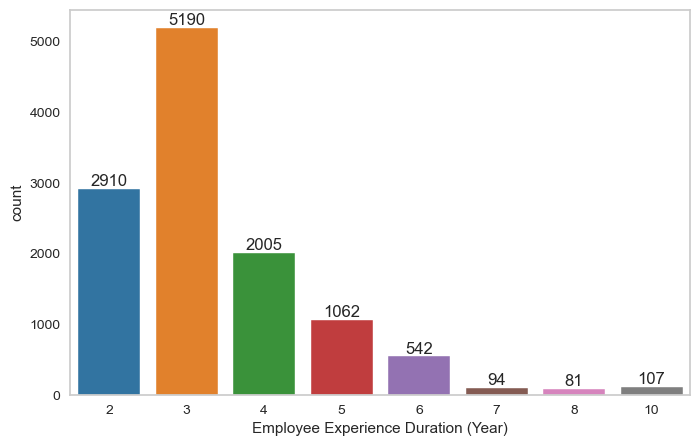

In [28]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="time_spend_company", data=df, palette="tab10")
plt.xlabel("Employee Experience Duration (Year)")
ax.bar_label(ax.containers[0]);

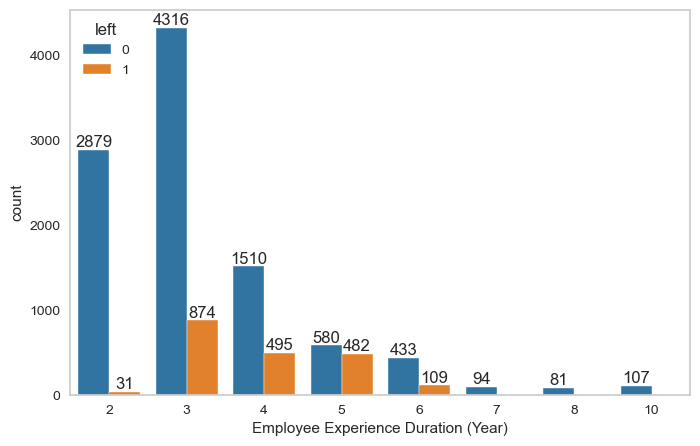

In [29]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="time_spend_company", hue="left", data=df, palette = "tab10")
plt.xlabel("Employee Experience Duration (Year)")
for i in ax.containers:
    ax.bar_label(i)

### Work Accident

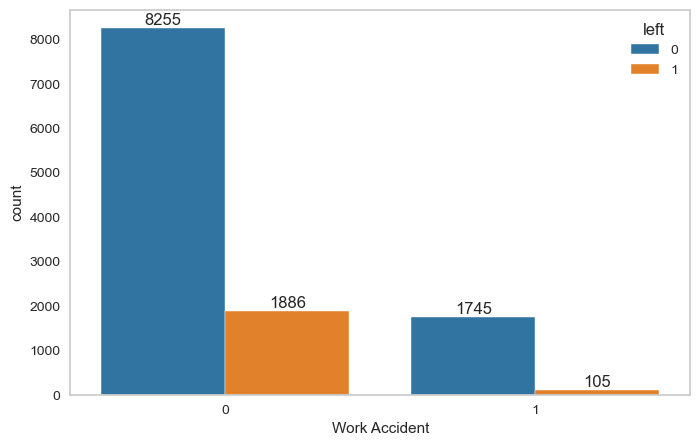

In [30]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="work_accident", hue="left", data=df, palette = "tab10")
plt.xlabel("Work Accident")
for i in ax.containers:
    ax.bar_label(i)

### promotion_last_5years

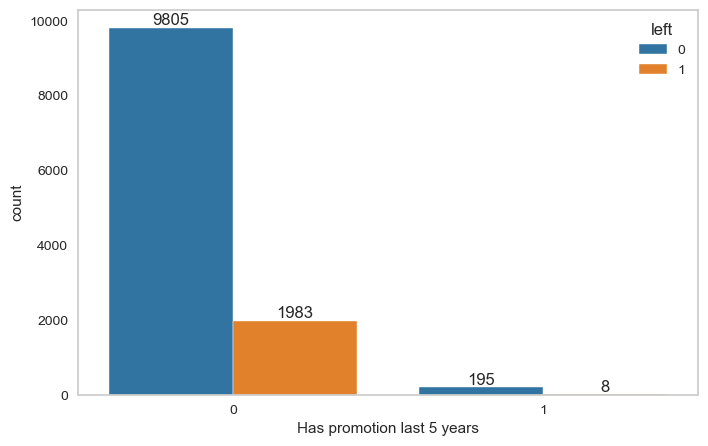

In [31]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="promotion_last_5years", hue="left", data=df, palette = "tab10")
plt.xlabel("Has promotion last 5 years")
for i in ax.containers:
    ax.bar_label(i)

### Departments

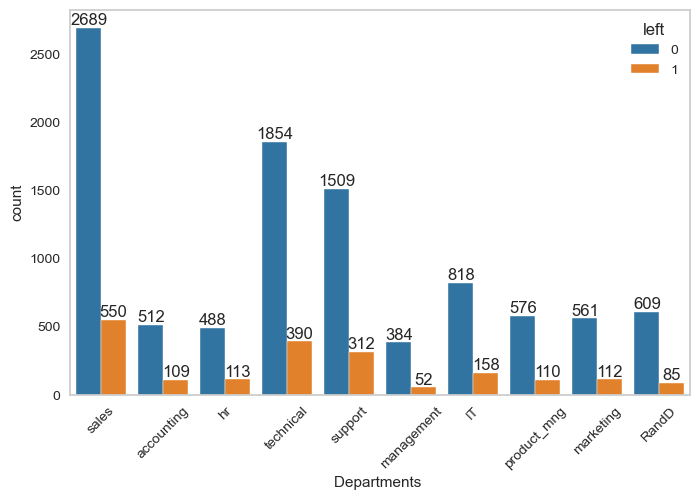

In [32]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="departments", hue="left", data=df, palette = "tab10")
plt.xlabel("Departments ")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)

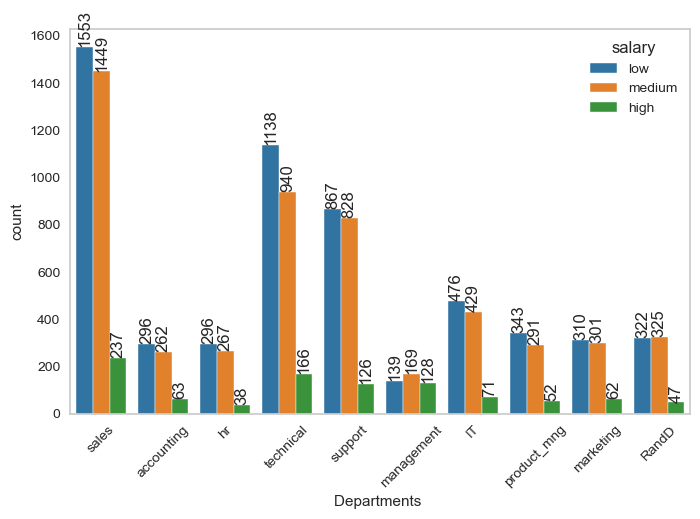

In [33]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="departments", hue="salary", data=df, palette = "tab10")
plt.xlabel("Departments ")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i, rotation=90)

### Salary

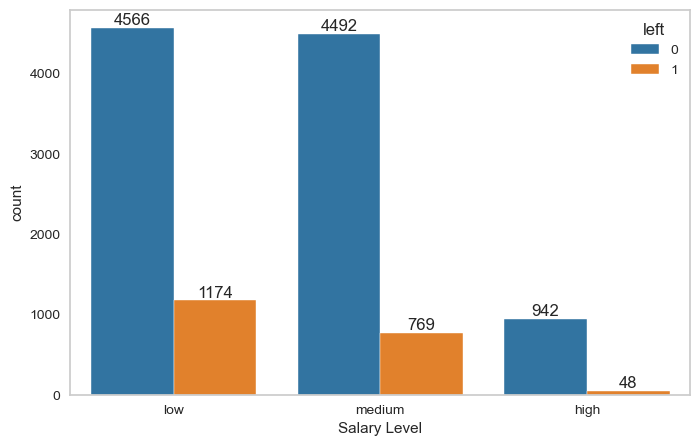

In [34]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="salary", hue="left", data=df, palette = "tab10")
plt.xlabel("Salary Level")
for i in ax.containers:
    ax.bar_label(i)

### Subplots of Features

You can use the methods of the matplotlib.

#### Distribution of numerical features

In [35]:
numeric = df.select_dtypes(exclude="O").columns
numeric

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'left'],
      dtype='object')

In [36]:
df[numeric].head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  promotion_last_5years  left  
0                   3              0                      0     1  
1                   6              0                      0     1  
2                   4              0                      0     1  
3                   5              0                      0     1  
4                   3              0                      0     1

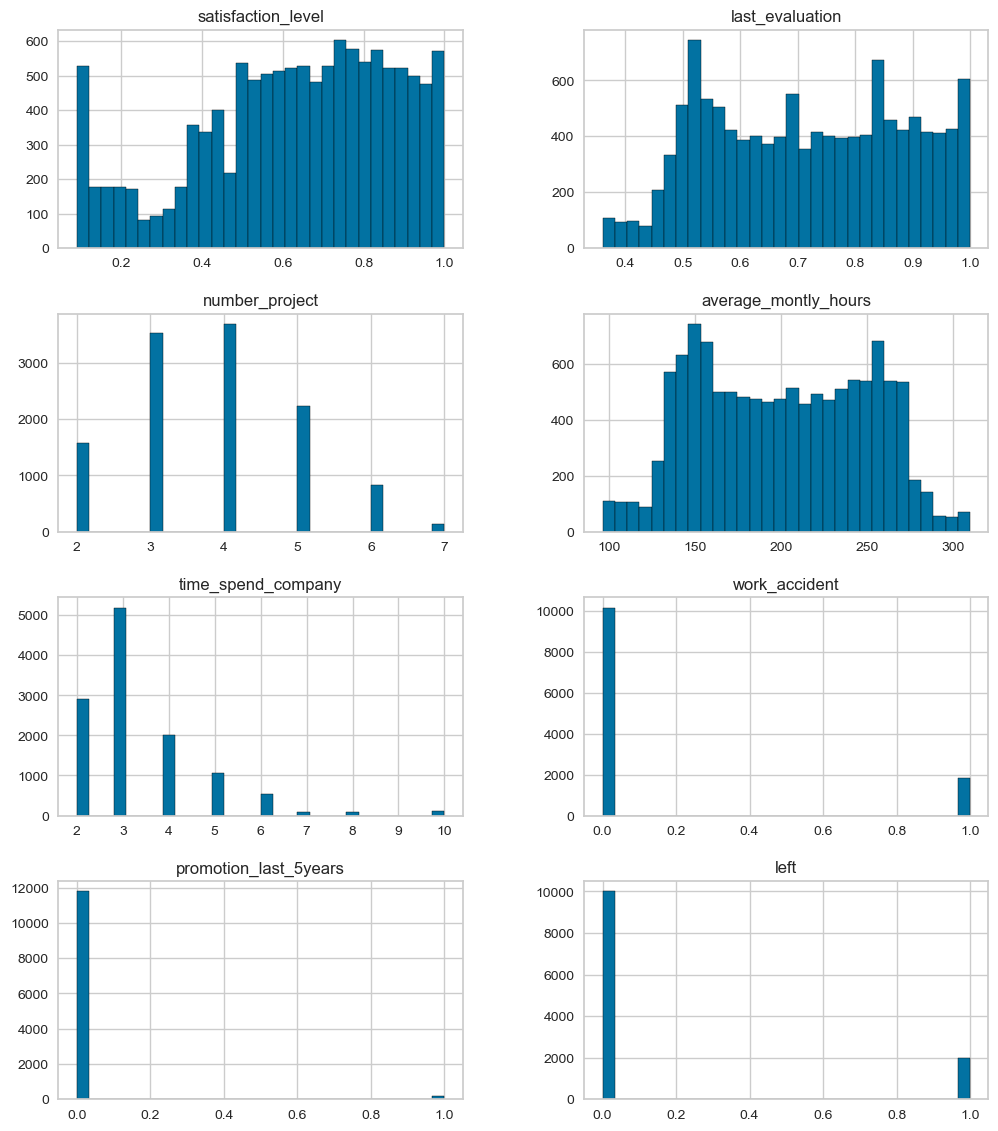

In [37]:
fig_ = df[numeric].hist(figsize=(12, 36), layout=(10,2), bins=30, edgecolor="black");

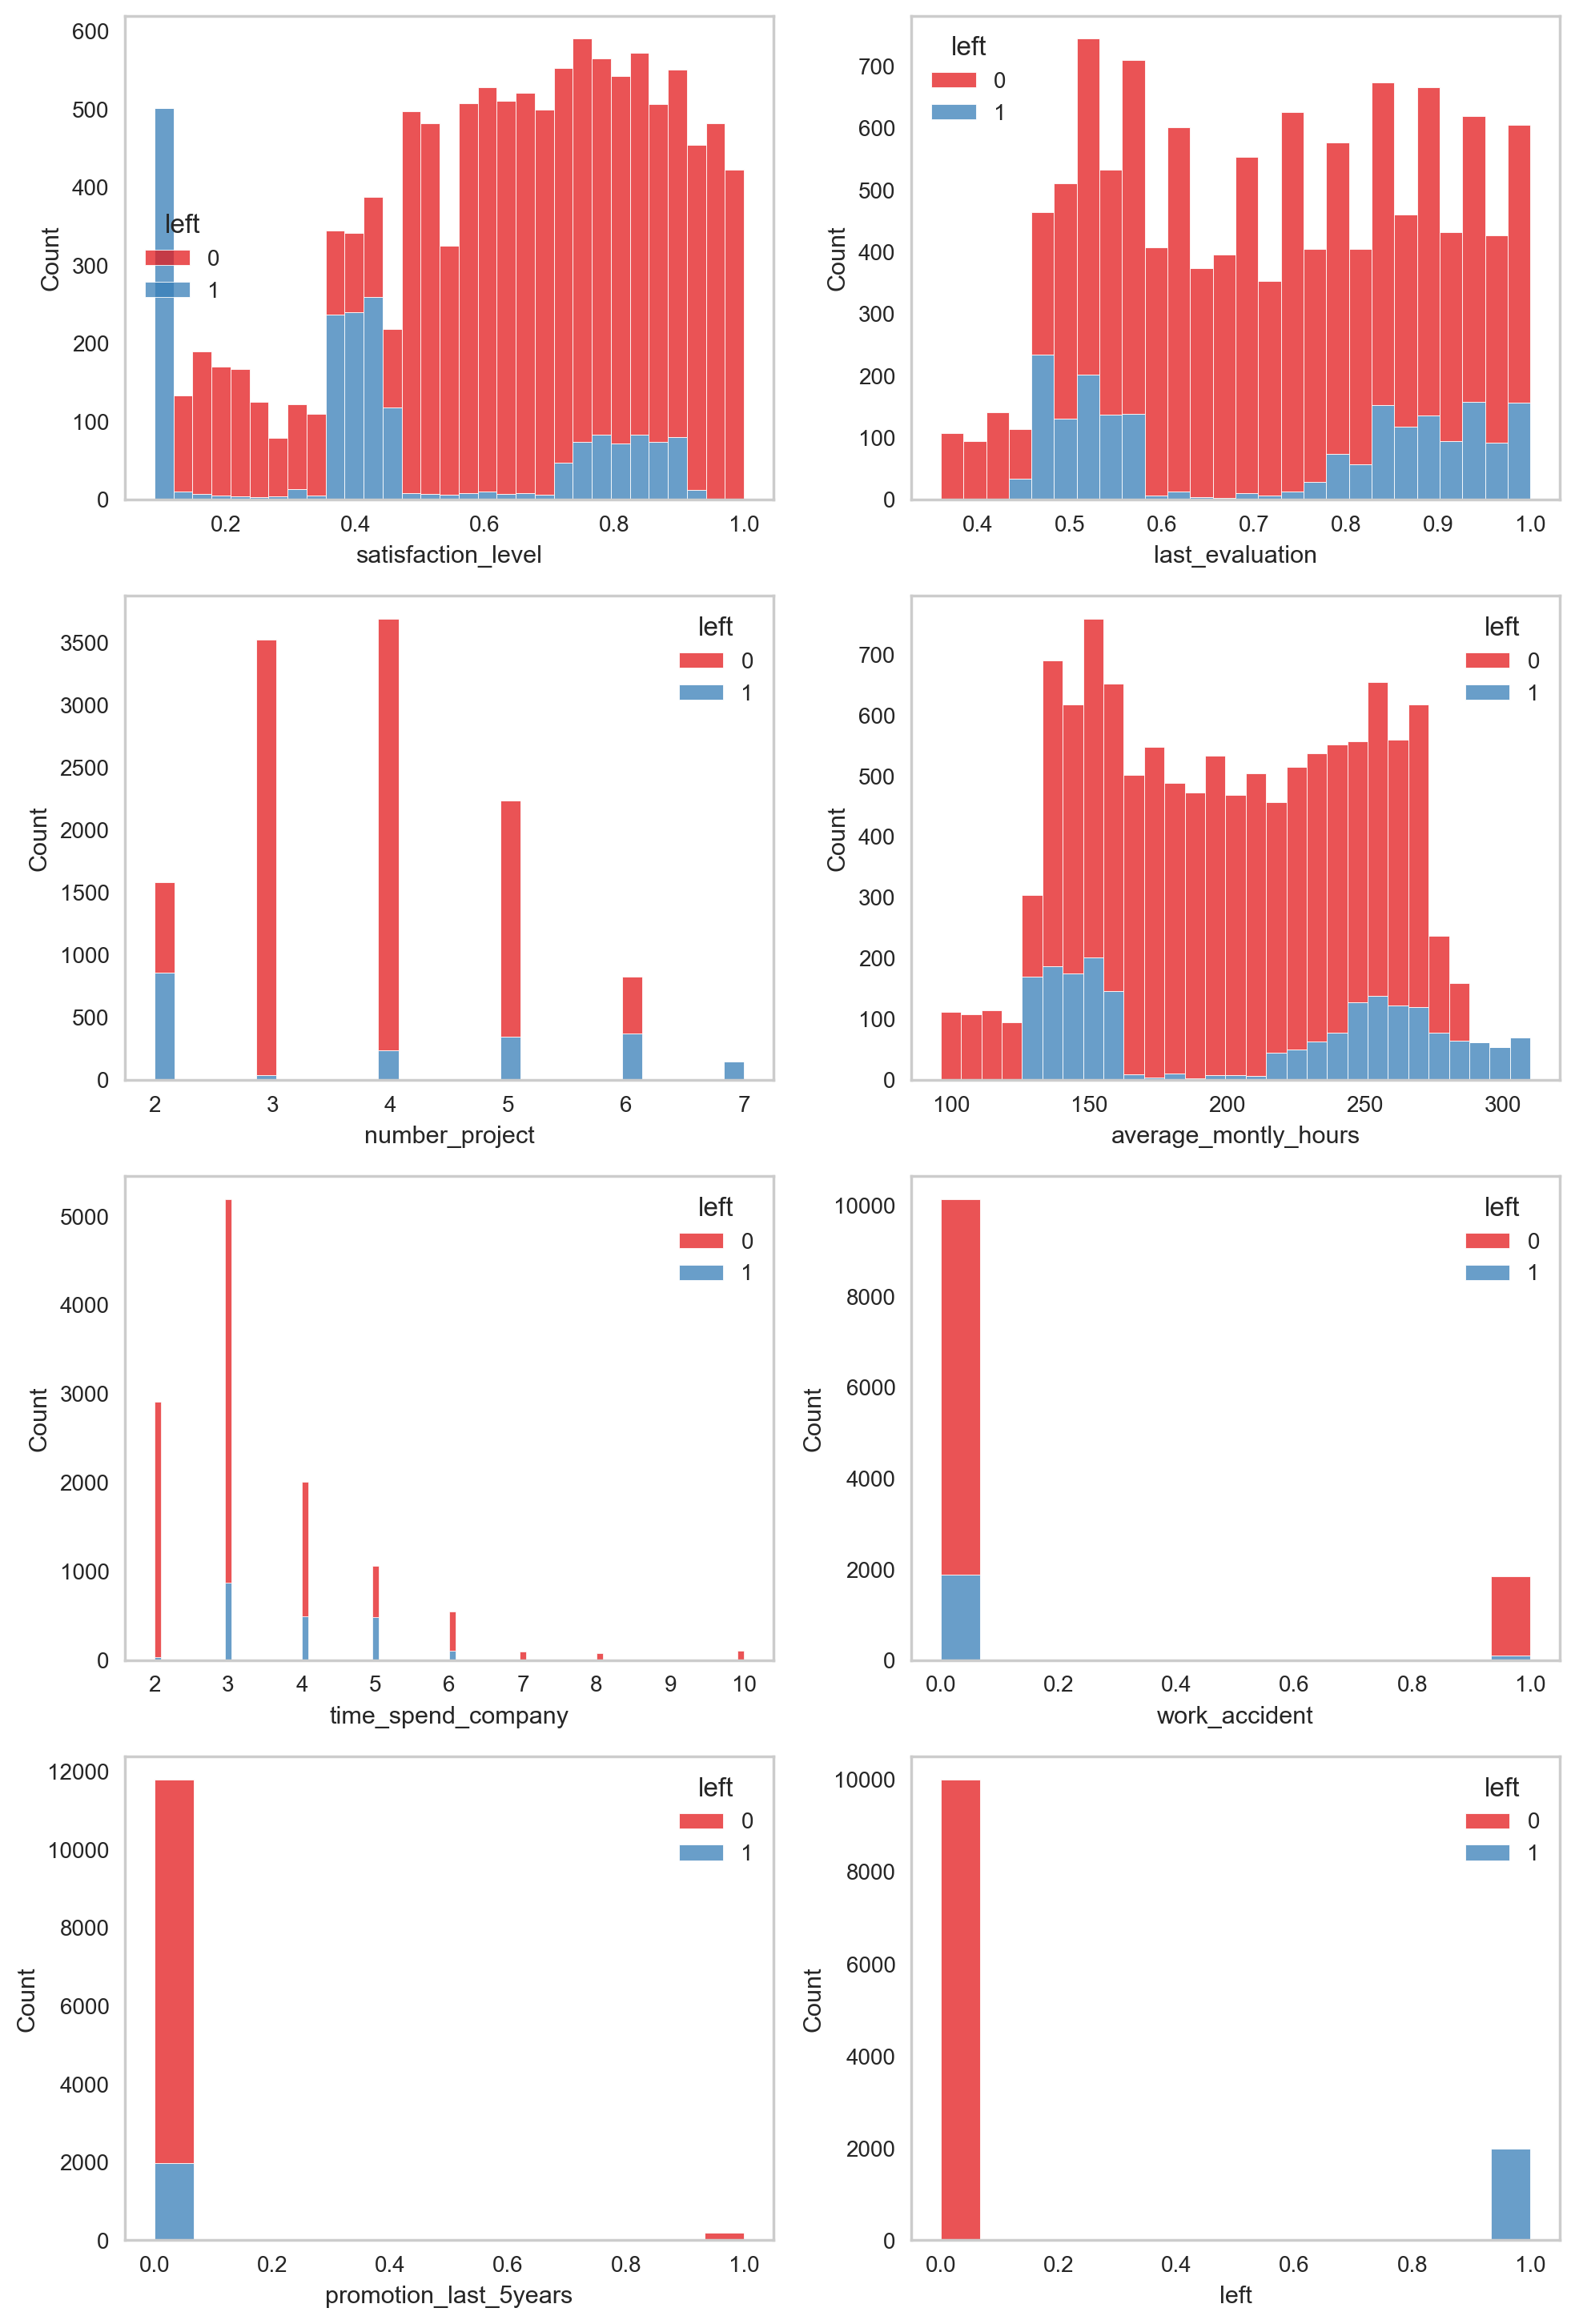

In [38]:
fig = plt.figure(figsize=(10,36), dpi=200)
for i, col in enumerate(df[numeric]):
        plt.subplot(10,2,i+1)
        sns.histplot(x= col, hue="left", data=df, multiple="stack", palette="Set1"
                    )
plt.tight_layout();

#### Boxplots for numerical features based on the "left" feature

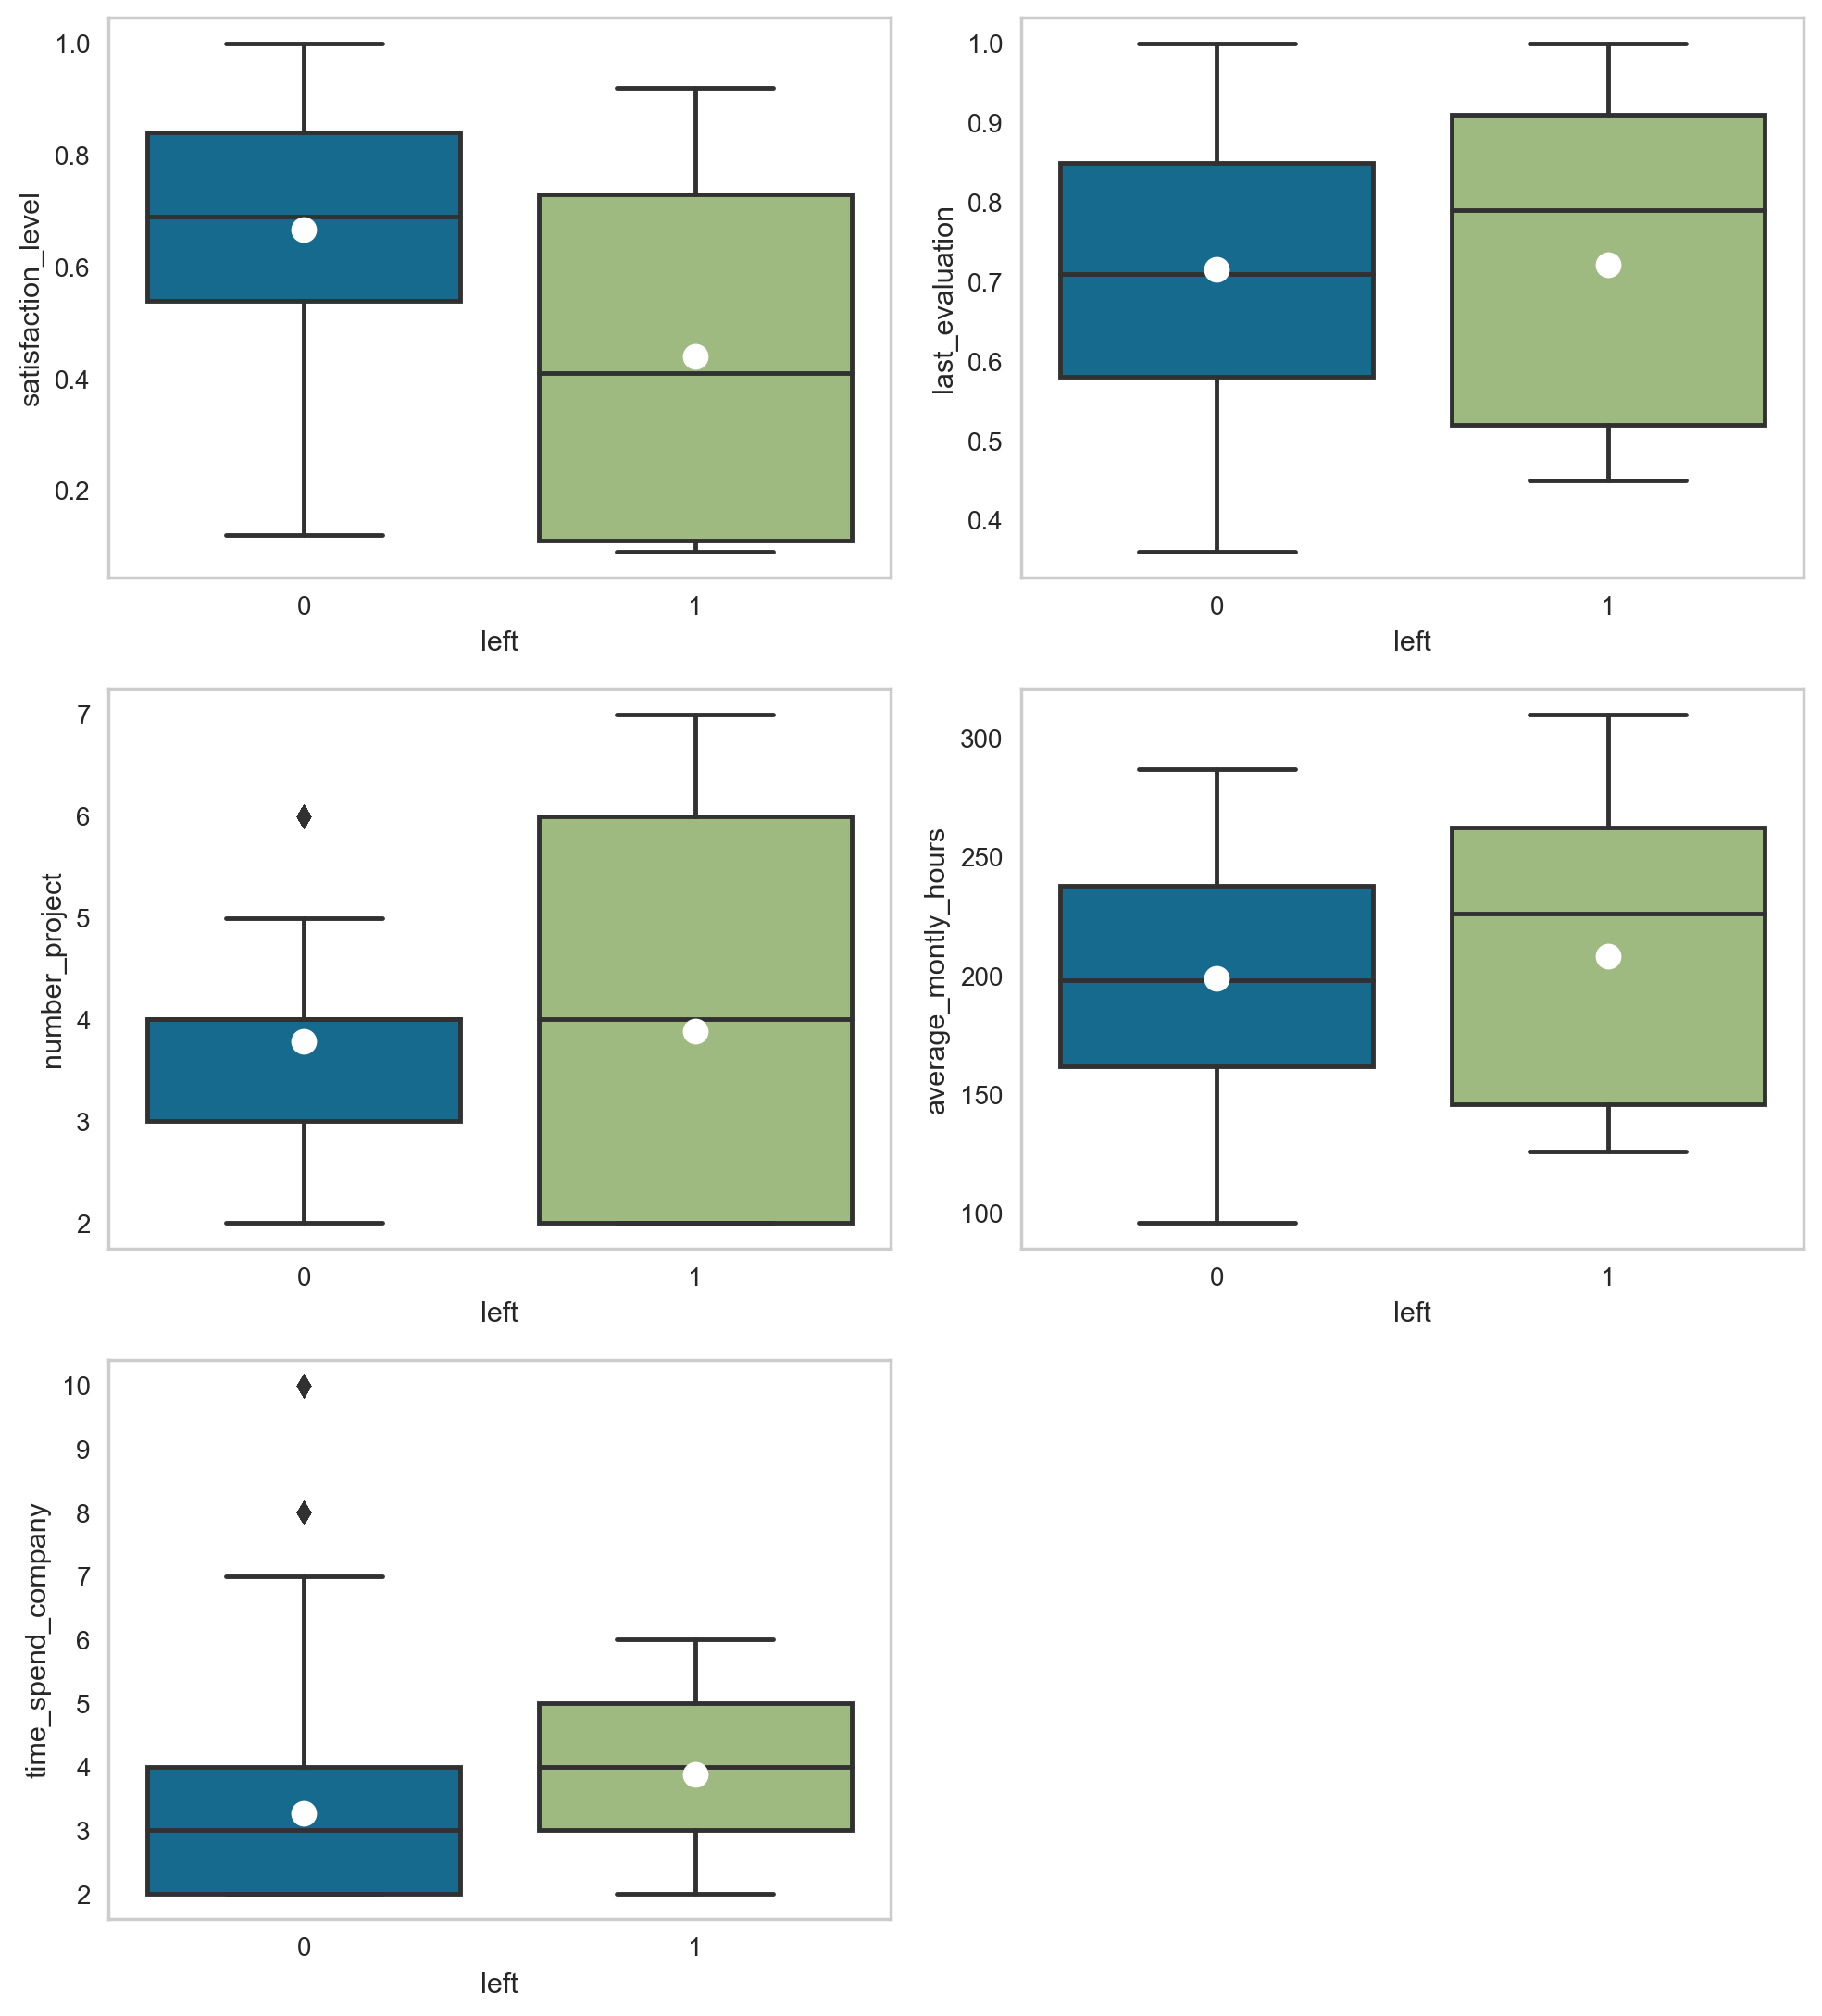

In [39]:
fig = plt.figure(figsize=(10,36), dpi=200)
for i, col in enumerate(df[numeric].iloc[:,:-3]):
        plt.subplot(10,2,i+1)
        sns.boxplot(x= "left", y=col, data=df,
                    showmeans=True,
                    meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.tight_layout();

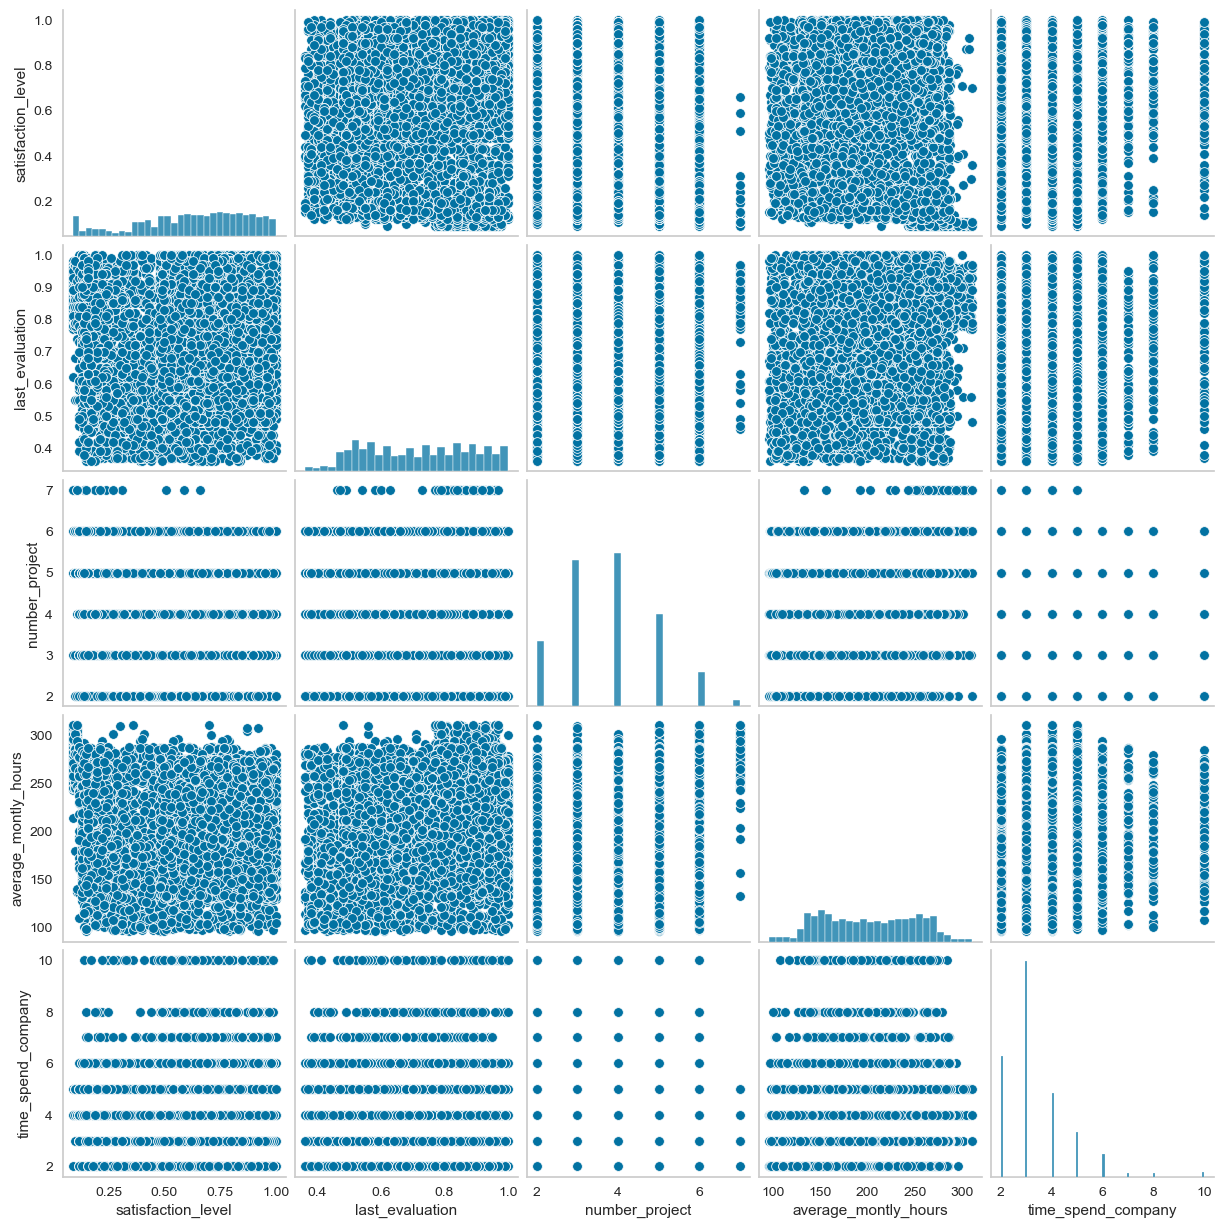

In [40]:
sns.pairplot(df[numeric].iloc[:,:-3]);

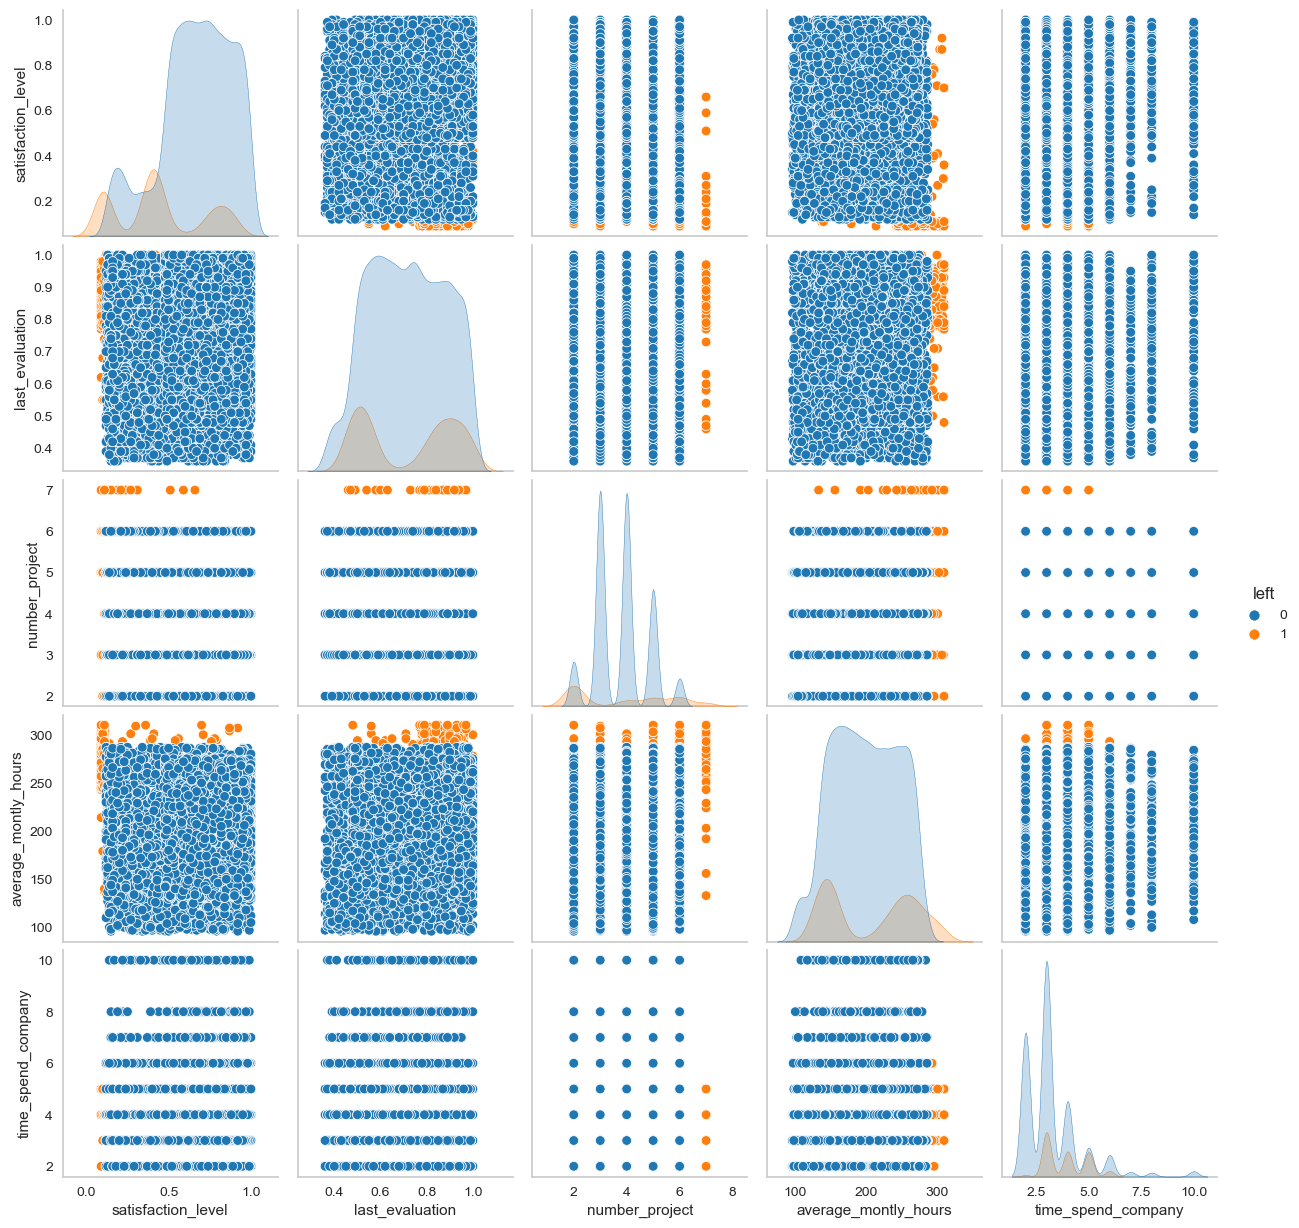

In [41]:
sns.pairplot(df[numeric].iloc[:, [0,1,2,3,4,7]], hue="left", palette="tab10" );

In [42]:
df.corr().style.background_gradient(cmap='YlGnBu')

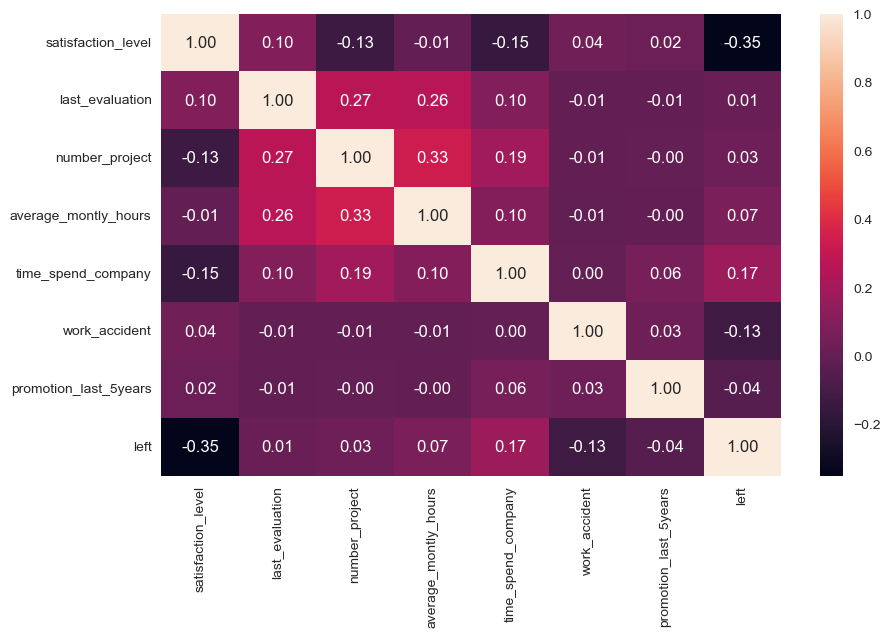

In [43]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

## 3. Data Pre-Processing

### Defining X and y

In [47]:
# data with duplicated

df_with_dp = df_copy.copy()
df_with_dp = clean_columns(df_with_dp)
df_with_dp.head()

2 column names have been cleaned

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  left  promotion_last_5years departments  \
0                   3              0     1                      0       sales   
1                   6              0     1                      0       sales   
2                   4              0     1                      0       sales   
3                   5              0     1                      0       sales   
4                   3              0     1                      0       sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [49]:
df_with_dp.shape

(14999, 10)

In [48]:
# data without duplicated

df_without_dp = df.copy()
df_without_dp.shape

(11991, 10)

In [50]:
X_dp = df_with_dp.drop(columns="left")
y_dp = df_with_dp.left

In [51]:
X = df_without_dp.drop(columns="left")
y = df_without_dp.left

In [52]:
X_dp.shape

(14999, 9)

In [53]:
y_dp.shape

(14999,)

In [54]:
X.shape

(11991, 9)

In [55]:
y.shape

(11991,)

#### Encoding and Scaling

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [56]:
# We will implement ordinal encoding to the categorical features and then scaling the data before KMeans Clustering

from sklearn.compose import make_column_transformer

# one_enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, ["salary", "departments"]), remainder= "passthrough")

column_trans.fit_transform(X_dp)

column_names=column_trans.get_feature_names_out()

X_dp_enc = pd.DataFrame(column_trans.fit_transform(X_dp), columns=column_names)
X_dp_enc

ordinalencoder__salary  ordinalencoder__departments  \
0                        1.00                         7.00   
1                        2.00                         7.00   
2                        2.00                         7.00   
3                        1.00                         7.00   
4                        1.00                         7.00   
...                       ...                          ...   
14994                    1.00                         8.00   
14995                    1.00                         8.00   
14996                    1.00                         8.00   
14997                    1.00                         8.00   
14998                    1.00                         8.00   

       remainder__satisfaction_level  remainder__last_evaluation  \
0                               0.38                        0.53   
1                               0.80                        0.86   
2                               0.11                        0.88   
3                               0.72                        0.87   
4                               0.37                        0.52   
...                              ...                         ...   
14994                           0.40                        0.57   
14995                           0.37                        0.48   
14996                           0.37                        0.53   
14997                           0.11                        0.96   
14998                           0.37                        0.52   

       remainder__number_project  remainder__average_montly_hours  \
0                           2.00                           157.00   
1                           5.00                           262.00   
2                           7.00                           272.00   
3                           5.00                           223.00   
4                           2.00                           159.00   
...                          ...                              ...   
14994                       2.00                           151.00   
14995                       2.00                           160.00   
14996                       2.00                           143.00   
14997                       6.00                           280.00   
14998                       2.00                           158.00   

       remainder__time_spend_company  remainder__work_accident  \
0                               3.00                      0.00   
1                               6.00                      0.00   
2                               4.00                      0.00   
3                               5.00                      0.00   
4                               3.00                      0.00   
...                              ...                       ...   
14994                           3.00                      0.00   
14995                           3.00                      0.00   
14996                           3.00                      0.00   
14997                           4.00                      0.00   
14998                           3.00                      0.00   

       remainder__promotion_last_5years  
0                                  0.00  
1                                  0.00  
2                                  0.00  
3                                  0.00  
4                                  0.00  
...                                 ...  
14994                              0.00  
14995                              0.00  
14996                              0.00  
14997                              0.00  
14998                              0.00  

[14999 rows x 9 columns]

In [ ]:
# Effects of different scaler on hopkins score

from pyclustertend import hopkins

counter = 1
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler()]
scal_str = ["MinMaxScaling","StandardScaling", "RobustScaling" ]
for i in scalers:
    X_scaled = i.fit_transform(X_dp_enc)
    print(f"{scal_str[counter-1]}: {hopkins(X_scaled, X_scaled.shape[0])}")
    counter += 1

In [58]:
# As we get the better result with StandartScaler, we will continue with it

scalar = StandardScaler()
X_dp_scaled = scalar.fit_transform(X_dp_enc)

In [59]:
one_enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, ["salary", "departments"]), remainder= "passthrough")

column_trans.fit_transform(X)

column_names=column_trans.get_feature_names_out()

X_enc = pd.DataFrame(column_trans.fit_transform(X), columns=column_names)
X_enc

ordinalencoder__salary  ordinalencoder__departments  \
0                        1.00                         7.00   
1                        2.00                         7.00   
2                        2.00                         7.00   
3                        1.00                         7.00   
4                        1.00                         7.00   
...                       ...                          ...   
11986                    0.00                         4.00   
11987                    0.00                         4.00   
11988                    0.00                         4.00   
11989                    0.00                         5.00   
11990                    1.00                         0.00   

       remainder__satisfaction_level  remainder__last_evaluation  \
0                               0.38                        0.53   
1                               0.80                        0.86   
2                               0.11                        0.88   
3                               0.72                        0.87   
4                               0.37                        0.52   
...                              ...                         ...   
11986                           0.90                        0.55   
11987                           0.74                        0.95   
11988                           0.85                        0.54   
11989                           0.33                        0.65   
11990                           0.50                        0.73   

       remainder__number_project  remainder__average_montly_hours  \
0                           2.00                           157.00   
1                           5.00                           262.00   
2                           7.00                           272.00   
3                           5.00                           223.00   
4                           2.00                           159.00   
...                          ...                              ...   
11986                       3.00                           259.00   
11987                       5.00                           266.00   
11988                       3.00                           185.00   
11989                       3.00                           172.00   
11990                       4.00                           180.00   

       remainder__time_spend_company  remainder__work_accident  \
0                               3.00                      0.00   
1                               6.00                      0.00   
2                               4.00                      0.00   
3                               5.00                      0.00   
4                               3.00                      0.00   
...                              ...                       ...   
11986                          10.00                      1.00   
11987                          10.00                      0.00   
11988                          10.00                      0.00   
11989                          10.00                      0.00   
11990                           3.00                      0.00   

       remainder__promotion_last_5years  
0                                  0.00  
1                                  0.00  
2                                  0.00  
3                                  0.00  
4                                  0.00  
...                                 ...  
11986                              1.00  
11987                              1.00  
11988                              1.00  
11989                              1.00  
11990                              0.00  

[11991 rows x 9 columns]

In [ ]:
# Effects of different scaler on hopkins score

counter = 1
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler()]
scal_str = ["MinMaxScaling","StandardScaling", "RobustScaling" ]
for i in scalers:
    X_scaled = i.fit_transform(X_enc)
    print(f"{scal_str[counter-1]}: {hopkins(X_scaled, X_scaled.shape[0])}")
    counter += 1

In [60]:
X_scaled = scalar.fit_transform(X_enc)

In [69]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X_enc.columns)
X_scaled_df["left"] = y
X_scaled_df

ordinalencoder__salary  ordinalencoder__departments  \
0                       -0.57                         0.39   
1                        1.03                         0.39   
2                        1.03                         0.39   
3                       -0.57                         0.39   
4                       -0.57                         0.39   
...                       ...                          ...   
11986                   -2.16                        -0.65   
11987                   -2.16                        -0.65   
11988                   -2.16                        -0.65   
11989                   -2.16                        -0.30   
11990                   -0.57                        -2.03   

       remainder__satisfaction_level  remainder__last_evaluation  \
0                              -1.04                       -1.11   
1                               0.71                        0.85   
2                              -2.16                        0.97   
3                               0.37                        0.91   
4                              -1.08                       -1.17   
...                              ...                         ...   
11986                           1.12                       -0.99   
11987                           0.46                        1.39   
11988                           0.91                       -1.05   
11989                          -1.24                       -0.40   
11990                          -0.54                        0.08   

       remainder__number_project  remainder__average_montly_hours  \
0                          -1.55                            -0.89   
1                           1.03                             1.26   
2                           2.75                             1.47   
3                           1.03                             0.46   
4                          -1.55                            -0.85   
...                          ...                              ...   
11986                      -0.69                             1.20   
11987                       1.03                             1.34   
11988                      -0.69                            -0.32   
11989                      -0.69                            -0.58   
11990                       0.17                            -0.42   

       remainder__time_spend_company  remainder__work_accident  \
0                              -0.27                     -0.43   
1                               1.98                     -0.43   
2                               0.48                     -0.43   
3                               1.23                     -0.43   
4                              -0.27                     -0.43   
...                              ...                       ...   
11986                           4.99                      2.34   
11987                           4.99                     -0.43   
11988                           4.99                     -0.43   
11989                           4.99                     -0.43   
11990                          -0.27                     -0.43   

       remainder__promotion_last_5years  left  
0                                 -0.13     1  
1                                 -0.13     1  
2                                 -0.13     1  
3                                 -0.13     1  
4                                 -0.13     1  
...                                 ...   ...  
11986                              7.62     0  
11987                              7.62     0  
11988                              7.62     0  
11989                              7.62     0  
11990                             -0.13     0  

[11991 rows x 10 columns]

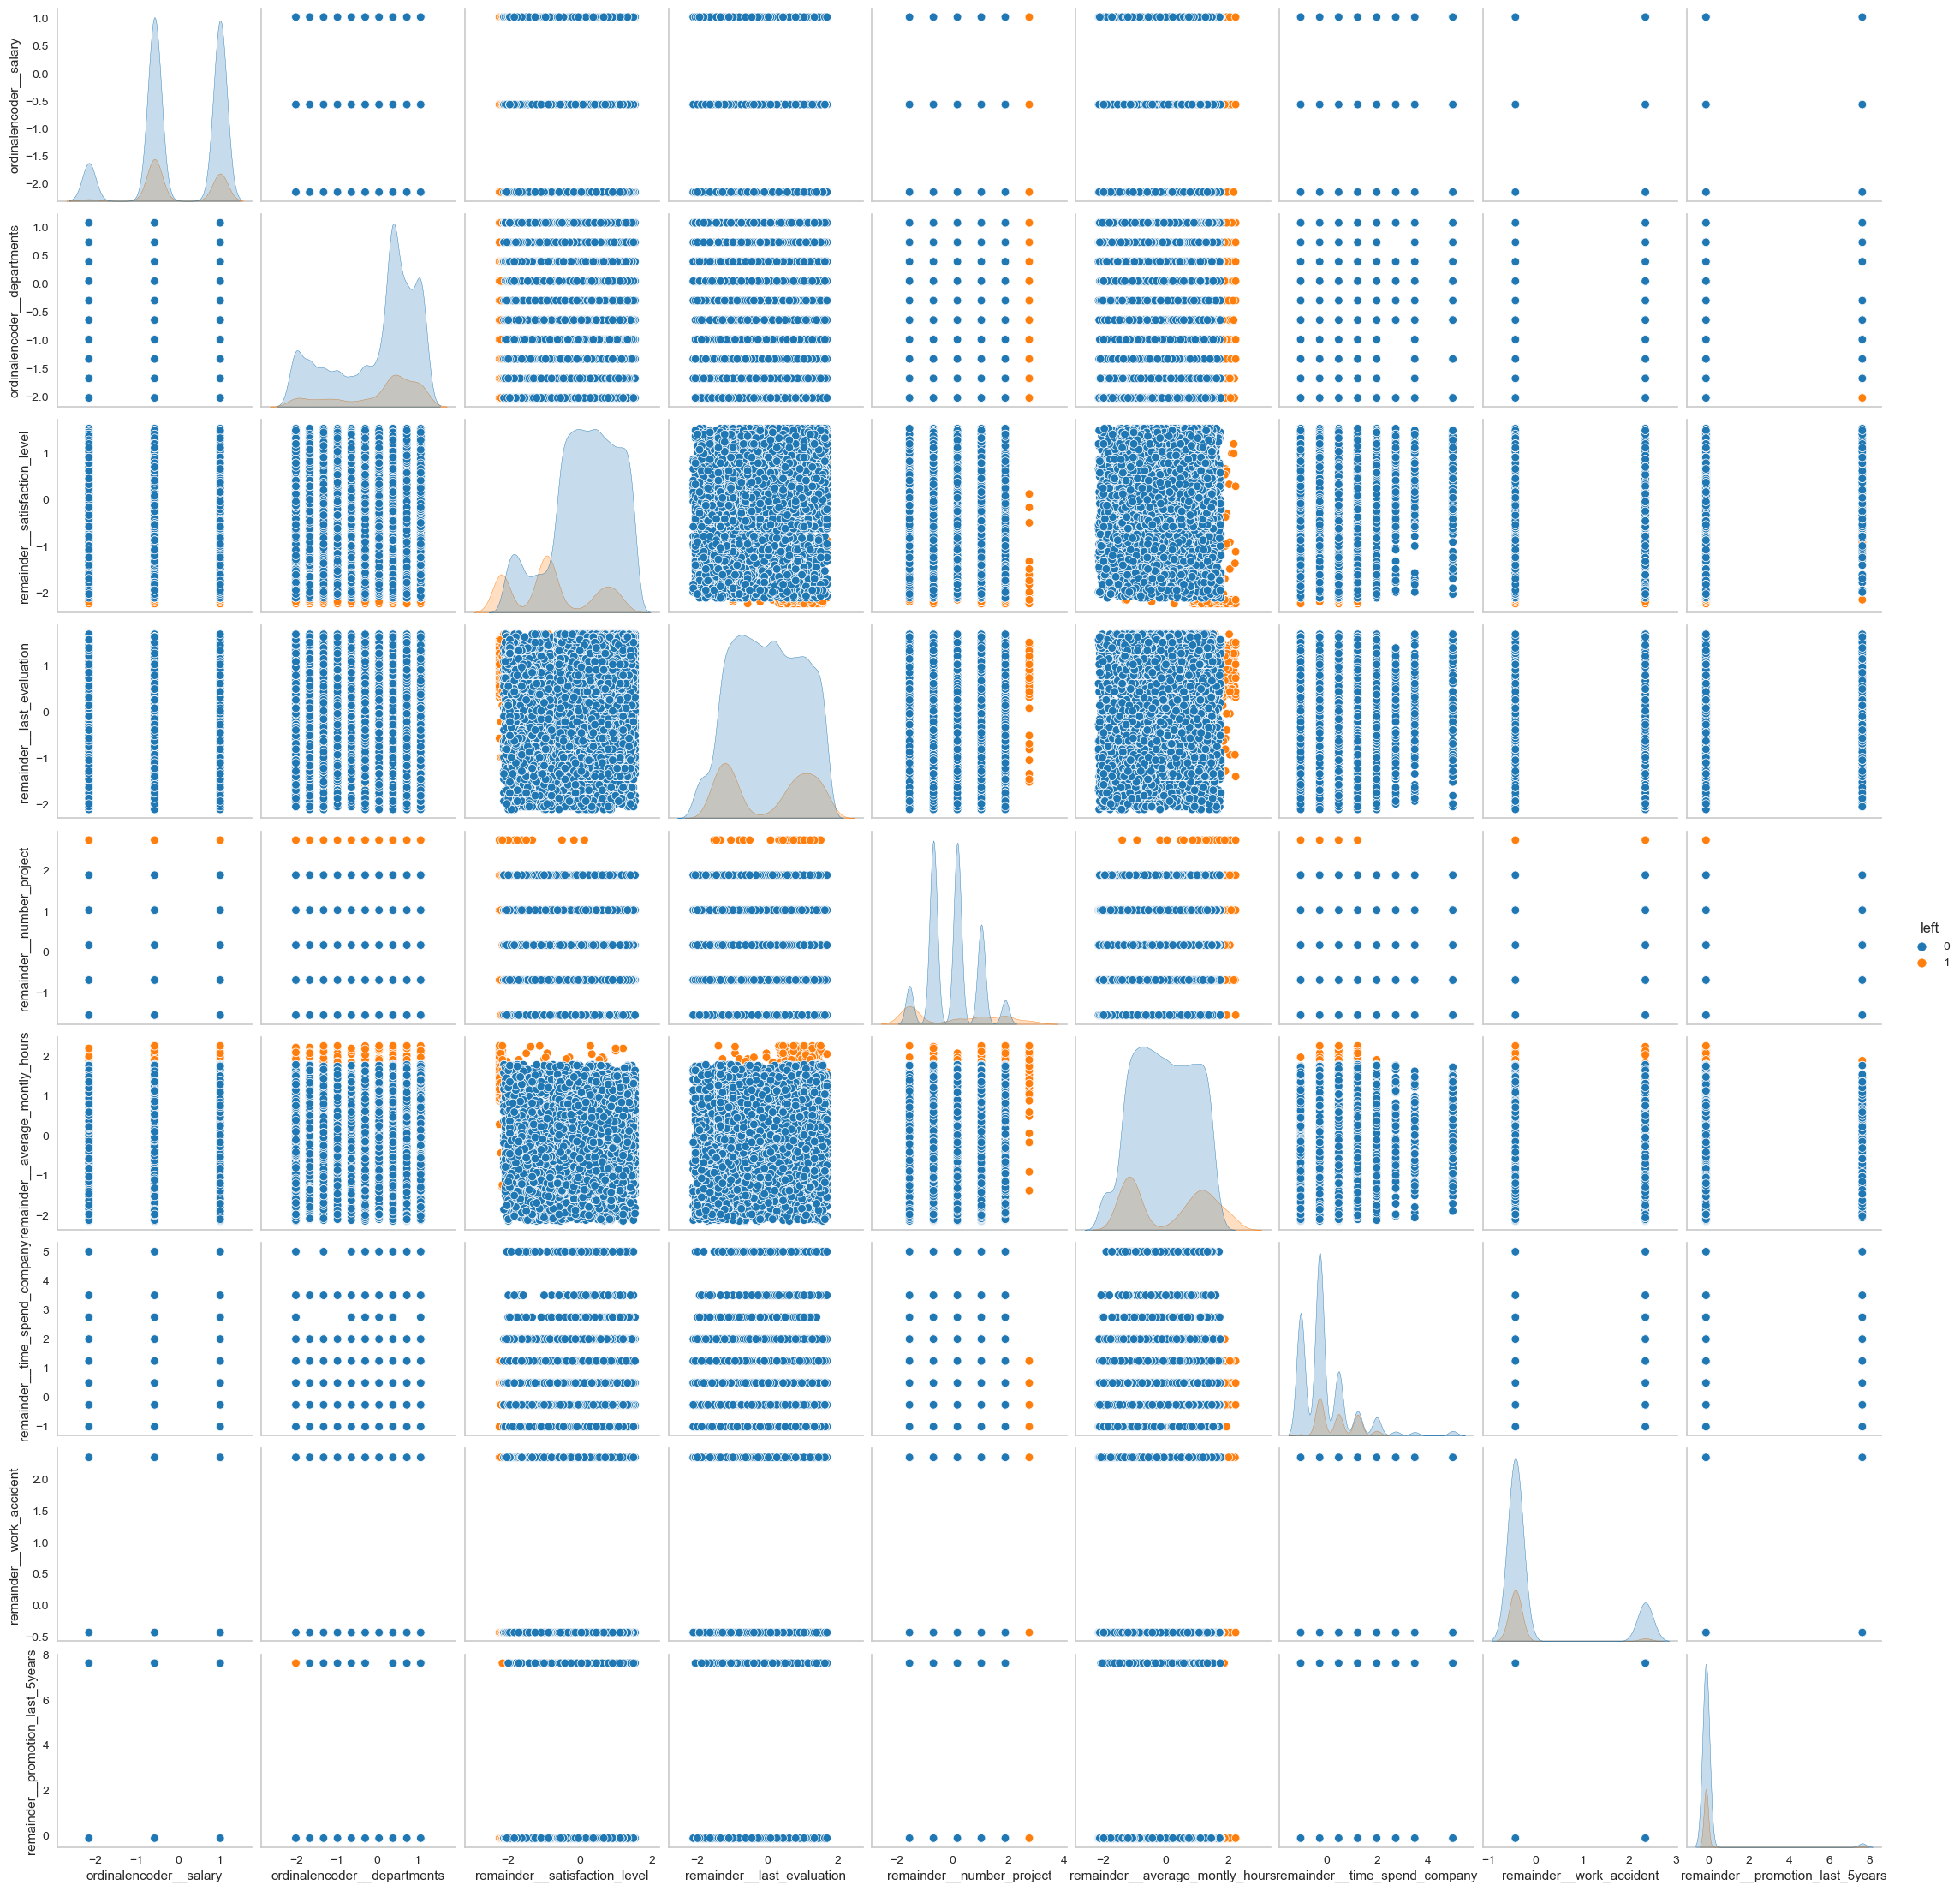

In [70]:
sns.pairplot(X_scaled_df, hue="left", palette="tab10");

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

In [74]:
hopkins(X_scaled, X_scaled.shape[0])

0.15922120428958583

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [75]:
ssd = []  # sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters = k, random_state=101)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

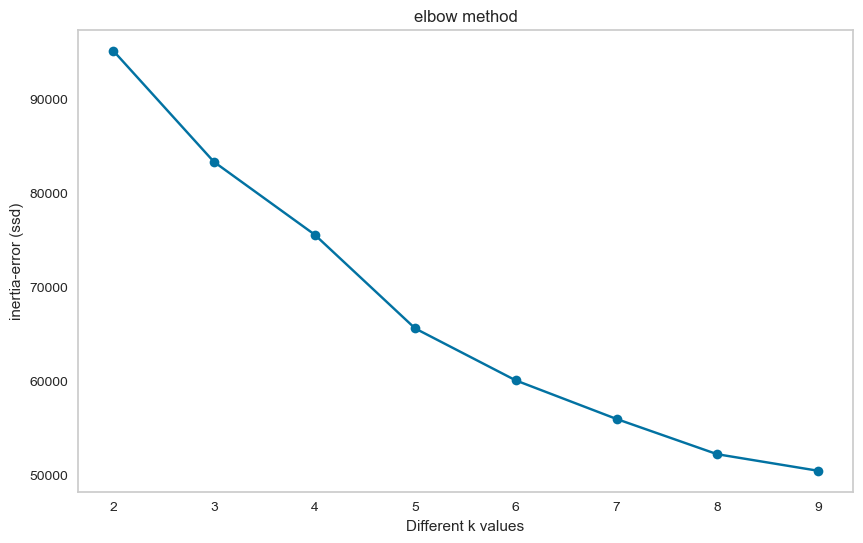

In [76]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method")

In [77]:
ssd

[95147.89633441022,
 83317.67494058347,
 75573.6261216405,
 65571.06550727098,
 60037.448711227975,
 55936.02631827199,
 52182.465015116475,
 50423.134908929605]

In [78]:
pd.Series(ssd).diff()

0         NaN
1   -11830.22
2    -7744.05
3   -10002.56
4    -5533.62
5    -4101.42
6    -3753.56
7    -1759.33
dtype: float64

In [79]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1      NaN
2 11830.22
3  7744.05
4 10002.56
5  5533.62
6  4101.42
7  3753.56
8  1759.33

<AxesSubplot:>

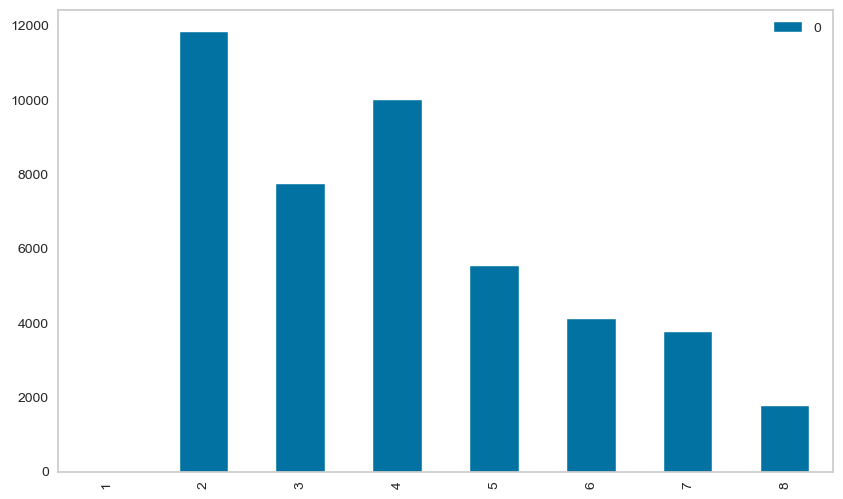

In [80]:
df_diff.plot(kind='bar')

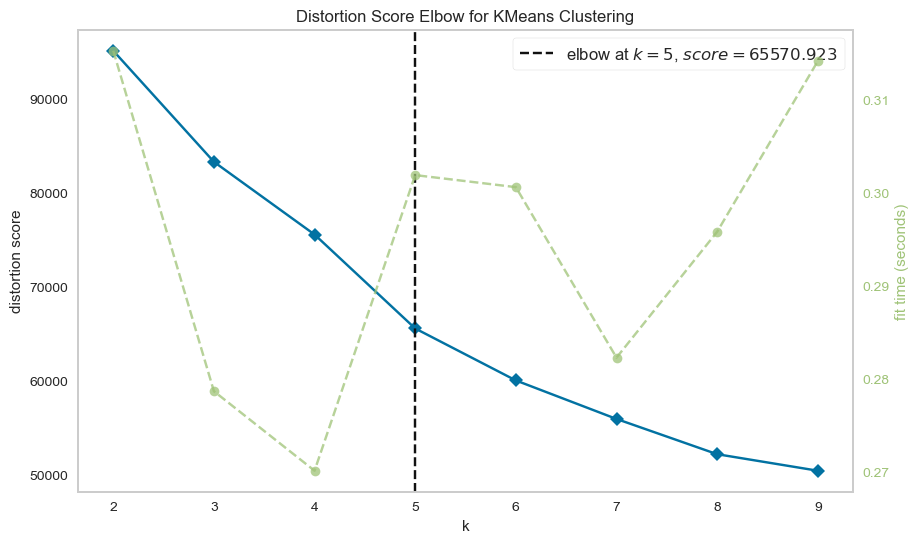

In [81]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=101)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();

In [82]:
from sklearn.metrics import silhouette_score

In [83]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.1705954118477692
For n_clusters=3, the silhouette score is 0.1711710634653489
For n_clusters=4, the silhouette score is 0.20044073372570606
For n_clusters=5, the silhouette score is 0.16539526263411686
For n_clusters=6, the silhouette score is 0.17693824898387298
For n_clusters=7, the silhouette score is 0.18517184135559664
For n_clusters=8, the silhouette score is 0.1783665999761214


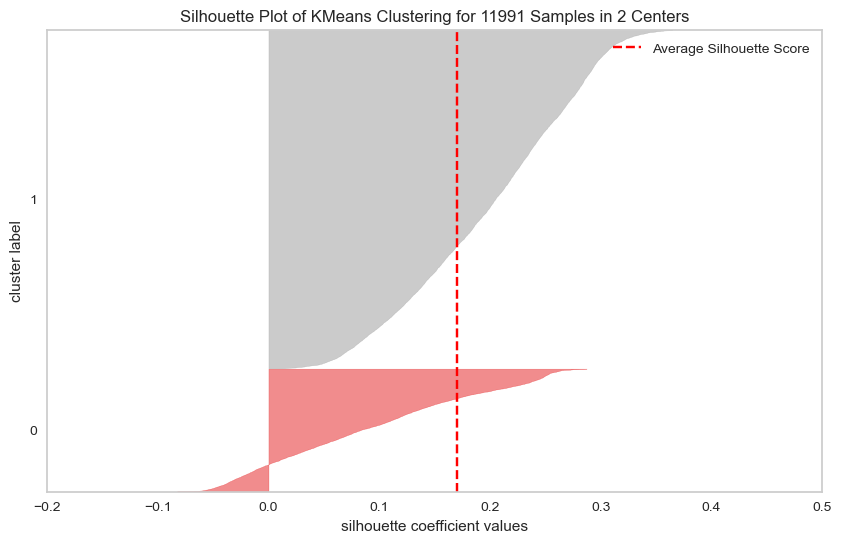

In [84]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=2, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [85]:
# Model fitting
model = KMeans(n_clusters = 2, random_state=101)
y_pred = model.fit_predict(X_scaled)
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [86]:
predicted_label=model.labels_
predicted_label

array([0, 1, 1, ..., 1, 1, 0])

In [87]:
X_scaled_df["pred_cluster"] = predicted_label
X_scaled_df.head()

ordinalencoder__salary  ordinalencoder__departments  \
0                   -0.57                         0.39   
1                    1.03                         0.39   
2                    1.03                         0.39   
3                   -0.57                         0.39   
4                   -0.57                         0.39   

   remainder__satisfaction_level  remainder__last_evaluation  \
0                          -1.04                       -1.11   
1                           0.71                        0.85   
2                          -2.16                        0.97   
3                           0.37                        0.91   
4                          -1.08                       -1.17   

   remainder__number_project  remainder__average_montly_hours  \
0                      -1.55                            -0.89   
1                       1.03                             1.26   
2                       2.75                             1.47   
3                       1.03                             0.46   
4                      -1.55                            -0.85   

   remainder__time_spend_company  remainder__work_accident  \
0                          -0.27                     -0.43   
1                           1.98                     -0.43   
2                           0.48                     -0.43   
3                           1.23                     -0.43   
4                          -0.27                     -0.43   

   remainder__promotion_last_5years  left  pred_cluster  
0                             -0.13     1             0  
1                             -0.13     1             1  
2                             -0.13     1             1  
3                             -0.13     1             1  
4                             -0.13     1             0

In [88]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(X_scaled_df.left, y_pred)

0.1550225242497193

In [89]:
ct = pd.crosstab(y_pred, X_scaled_df.left)
ct

left      0     1
row_0            
0      7832   922
1      2168  1069

In [92]:
clus_pred =X_scaled_df.groupby("left").mean().T
clus_pred

left                                 0     1
ordinalencoder__salary           -0.00  0.01
ordinalencoder__departments      -0.01  0.04
remainder__satisfaction_level     0.16 -0.79
remainder__last_evaluation       -0.01  0.03
remainder__number_project        -0.01  0.07
remainder__average_montly_hours  -0.03  0.16
remainder__time_spend_company    -0.08  0.39
remainder__work_accident          0.06 -0.28
remainder__promotion_last_5years  0.02 -0.10
pred_cluster                      0.22  0.54

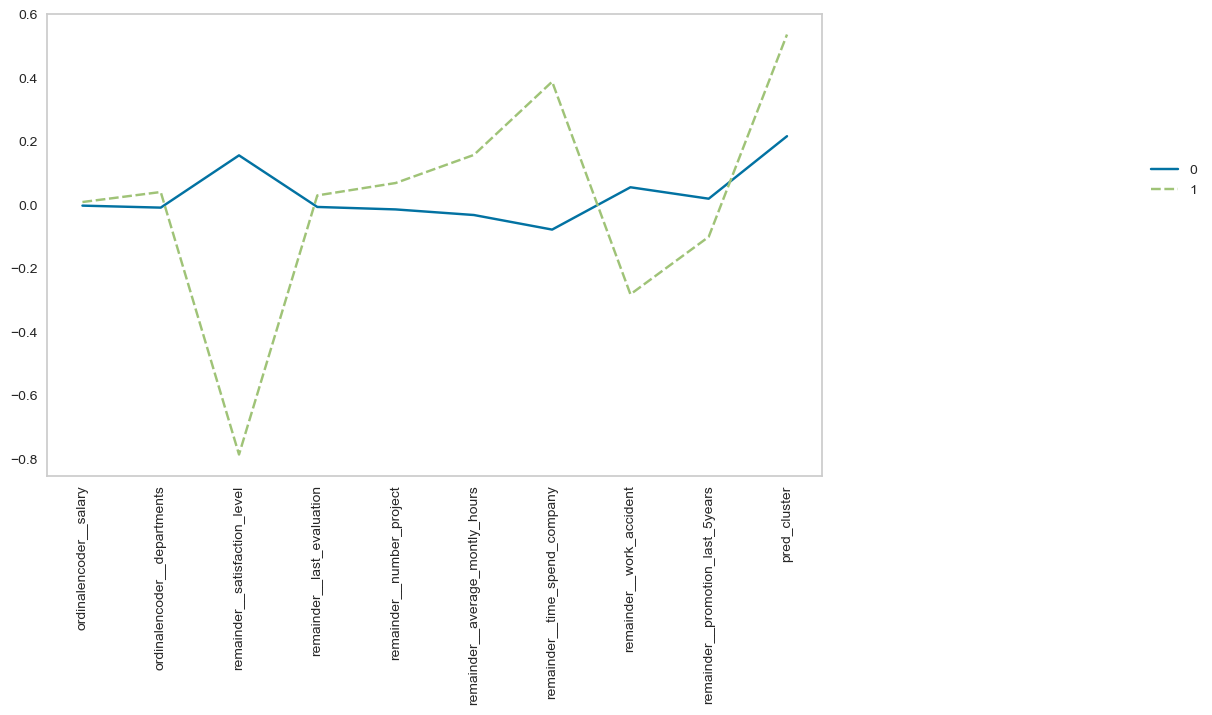

In [94]:
sns.lineplot(data = clus_pred)
plt.legend(bbox_to_anchor=(1.5, 0.7))
plt.xticks(rotation=90)
plt.show()

## 5. Model Building

### Split Data as Train and Test Set

In [98]:
X = df_with_dp.drop(columns="left")
y= df_with_dp.left

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [100]:
X.shape

(14999, 9)

In [101]:
y.shape

(14999,)

### Implement Lazypredict with duplicates

In [102]:
import pyforest
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [103]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:02<00:00,  2.14s/it]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.99               0.98     0.98      0.99   
ExtraTreesClassifier               0.99               0.98     0.98      0.99   
BaggingClassifier                  0.99               0.98     0.98      0.99   
LGBMClassifier                     0.99               0.98     0.98      0.99   
DecisionTreeClassifier             0.98               0.97     0.97      0.98   
LabelPropagation                   0.97               0.97     0.97      0.97   
LabelSpreading                     0.97               0.97     0.97      0.97   
XGBClassifier                      0.98               0.96     0.96      0.98   
ExtraTreeClassifier                0.97               0.96     0.96      0.97   
SVC                                0.96               0.95     0.95      0.96   
AdaBoostClassifier                 0.96               0.95     0.95      0.96   
KNeighborsClassifier               0.94               0.94     0.94      0.95   
QuadraticDiscriminantAnalysis      0.85               0.84     0.84      0.86   
NearestCentroid                    0.75               0.74     0.74      0.76   
GaussianNB                         0.66               0.72     0.72      0.69   
LogisticRegression                 0.79               0.64     0.64      0.77   
LinearDiscriminantAnalysis         0.78               0.62     0.62      0.76   
CalibratedClassifierCV             0.78               0.61     0.61      0.75   
LinearSVC                          0.78               0.60     0.60      0.74   
RidgeClassifier                    0.78               0.60     0.60      0.74   
RidgeClassifierCV                  0.78               0.60     0.60      0.74   
SGDClassifier                      0.79               0.57     0.57      0.73   
BernoulliNB                        0.75               0.56     0.56      0.71   
Perceptron                         0.76               0.52     0.52      0.69   
PassiveAggressiveClassifier        0.76               0.52     0.52      0.68   
DummyClassifier                    0.76               0.50     0.50      0.66   

                               Time Taken  
Model                                      
RandomForestClassifier               3.23  
ExtraTreesClassifier                 3.01  
BaggingClassifier                    0.92  
LGBMClassifier                       0.66  
DecisionTreeClassifier               0.20  
LabelPropagation                    12.92  
LabelSpreading                      17.74  
XGBClassifier                        4.36  
ExtraTreeClassifier                  0.11  
SVC                                  5.77  
AdaBoostClassifier                   1.36  
KNeighborsClassifier                 0.52  
QuadraticDiscriminantAnalysis        0.17  
NearestCentroid                      0.12  
GaussianNB                           0.10  
LogisticRegression                   0.27  
LinearDiscriminantAnalysis           0.25  
CalibratedClassifierCV               6.69  
LinearSVC                            2.48  
RidgeClassifier                      0.13  
RidgeClassifierCV                    0.14  
SGDClassifier                        0.30  
BernoulliNB                          0.10  
Perceptron                           0.11  
PassiveAggressiveClassifier          0.12  
DummyClassifier                      0.07

### Implement Lazypredict without duplicates

In [104]:
X = df_without_dp.drop(columns="left")
y = df_without_dp.left

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [106]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:42<00:00,  1.47s/it]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.99               0.97     0.97      0.99   
BaggingClassifier                  0.98               0.96     0.96      0.98   
RandomForestClassifier             0.99               0.96     0.96      0.99   
XGBClassifier                      0.98               0.96     0.96      0.98   
DecisionTreeClassifier             0.96               0.95     0.95      0.96   
SVC                                0.97               0.95     0.95      0.97   
ExtraTreesClassifier               0.98               0.95     0.95      0.98   
KNeighborsClassifier               0.95               0.94     0.94      0.95   
LabelSpreading                     0.95               0.93     0.93      0.95   
LabelPropagation                   0.95               0.93     0.93      0.95   
AdaBoostClassifier                 0.96               0.93     0.93      0.96   
ExtraTreeClassifier                0.93               0.90     0.90      0.94   
QuadraticDiscriminantAnalysis      0.84               0.84     0.84      0.86   
GaussianNB                         0.73               0.75     0.75      0.76   
NearestCentroid                    0.76               0.71     0.71      0.79   
LinearDiscriminantAnalysis         0.83               0.60     0.60      0.81   
PassiveAggressiveClassifier        0.75               0.60     0.60      0.76   
CalibratedClassifierCV             0.84               0.60     0.60      0.81   
LogisticRegression                 0.84               0.59     0.59      0.81   
LinearSVC                          0.84               0.57     0.57      0.80   
RidgeClassifier                    0.85               0.56     0.56      0.80   
RidgeClassifierCV                  0.85               0.56     0.56      0.80   
Perceptron                         0.58               0.56     0.56      0.63   
BernoulliNB                        0.83               0.56     0.56      0.79   
DummyClassifier                    0.83               0.50     0.50      0.76   
SGDClassifier                      0.83               0.50     0.50      0.76   

                               Time Taken  
Model                                      
LGBMClassifier                       0.55  
BaggingClassifier                    0.85  
RandomForestClassifier               2.27  
XGBClassifier                        3.08  
DecisionTreeClassifier               0.20  
SVC                                  3.20  
ExtraTreesClassifier                 2.55  
KNeighborsClassifier                 0.63  
LabelSpreading                      11.62  
LabelPropagation                     7.31  
AdaBoostClassifier                   1.09  
ExtraTreeClassifier                  0.09  
QuadraticDiscriminantAnalysis        0.12  
GaussianNB                           0.09  
NearestCentroid                      0.09  
LinearDiscriminantAnalysis           0.17  
PassiveAggressiveClassifier          0.11  
CalibratedClassifierCV               5.78  
LogisticRegression                   0.24  
LinearSVC                            1.79  
RidgeClassifier                      0.10  
RidgeClassifierCV                    0.12  
Perceptron                           0.11  
BernoulliNB                          0.11  
DummyClassifier                      0.07  
SGDClassifier                        0.24

### Build Pipeline to Implement ML Models

In [109]:
onehot_enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
ordinal_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
scaler = StandardScaler()

column_trans = make_column_transformer((onehot_enc, ["departments"]), (ordinal_enc, ["salary"]), remainder= "passthrough")

In [110]:
# define a function to compare evaluation metrics of models

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    plot_confusion_matrix(model, X_test, y_test);

    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_train, y_train);

### Distance Based(?) Algorithm

### Logistic Model Building - without duplicates

In [171]:
X = df_without_dp.drop(columns="left")
y = df_without_dp.left

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [173]:
# built a pipe model for Logistic Regression with default hyperparameter

operations = [("Encoder", column_trans), ("Scaler", scaler), ("log_model", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

log_pipe_model = Pipeline(steps=operations)

In [174]:
# fit the logistic regression model on train data

log_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('log_model',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      2001
           1       0.42      0.80      0.55       398

    accuracy                           0.78      2399
   macro avg       0.69      0.79      0.71      2399
weighted avg       0.86      0.78      0.81      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.96      0.76      0.84      7999
           1       0.40      0.83      0.54      1593

    accuracy                           0.77      9592
   macro avg       0.68      0.79      0.69      9592
weighted avg       0.86      0.77      0.79      9592



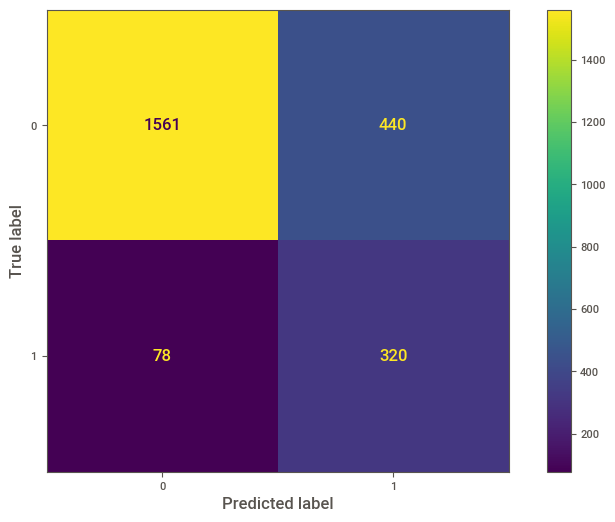

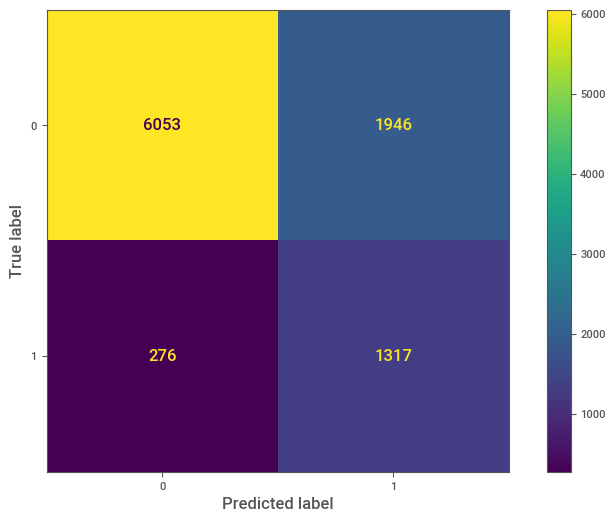

In [175]:
# check the evaluation metrics of logistic model

eval_metric(log_pipe_model, X_train, y_train, X_test, y_test)

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

#### Logistic Model Cross Validation

In [176]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_precision  train_precision  test_recall  \
1       0.03        0.01            0.39             0.41         0.79   
2       0.03        0.01            0.40             0.40         0.82   
3       0.03        0.01            0.42             0.40         0.82   
4       0.02        0.01            0.41             0.41         0.87   
5       0.02        0.01            0.40             0.41         0.84   
6       0.02        0.01            0.39             0.40         0.85   
7       0.03        0.01            0.40             0.40         0.82   
8       0.03        0.01            0.41             0.40         0.83   
9       0.03        0.01            0.40             0.40         0.80   
10      0.03        0.01            0.40             0.40         0.79   

    train_recall  test_f1  train_f1  test_accuracy  train_accuracy  
1           0.83     0.52      0.54           0.76            0.77  
2           0.83     0.53      0.54           0.76            0.77  
3           0.83     0.55      0.54           0.78            0.77  
4           0.84     0.56      0.55           0.77            0.77  
5           0.83     0.54      0.55           0.76            0.77  
6           0.81     0.54      0.54           0.76            0.77  
7           0.82     0.54      0.54           0.77            0.77  
8           0.83     0.55      0.54           0.78            0.77  
9           0.83     0.53      0.54           0.77            0.77  
10          0.82     0.53      0.54           0.76            0.77

In [177]:
df_scores.mean()[2:]

test_precision    0.40
train_precision   0.40
test_recall       0.82
train_recall      0.83
test_f1           0.54
train_f1          0.54
test_accuracy     0.77
train_accuracy    0.77
dtype: float64

#### Logistic Model GridsearchCV

In [178]:
# reset the pipe model
model = Pipeline(operations)

# defining the grid parameter
penalty = ["l1", "l2"]
C = np.logspace(-1, 2, 4)
solver = ['liblinear', 'lbfgs']

param_grid = {"log_model__penalty" : penalty,
             "log_model__C" : C,
             "log_model__solver" : solver}

# built Logistic grid model
log_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="recall", cv=5, n_jobs=-1)

In [179]:
# fit grid model on train data

log_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('Scaler', StandardScaler()),
                                       ('log_model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log_model__C': array([  0.1,   1. ,  10. , 100. ]),
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['liblinear', 'lbfgs']},
             scoring='recall')

In [180]:
log_grid_model.best_estimator_

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('log_model',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101, solver='liblinear'))])

In [181]:
log_grid_model.best_params_

{'log_model__C': 1.0,
 'log_model__penalty': 'l2',
 'log_model__solver': 'liblinear'}

In [182]:
log_grid_model.best_score_

0.8210977701543738

TEST REPORT
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      2001
           1       0.42      0.80      0.55       398

    accuracy                           0.78      2399
   macro avg       0.69      0.79      0.71      2399
weighted avg       0.86      0.78      0.81      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.96      0.76      0.84      7999
           1       0.40      0.83      0.54      1593

    accuracy                           0.77      9592
   macro avg       0.68      0.79      0.69      9592
weighted avg       0.86      0.77      0.79      9592



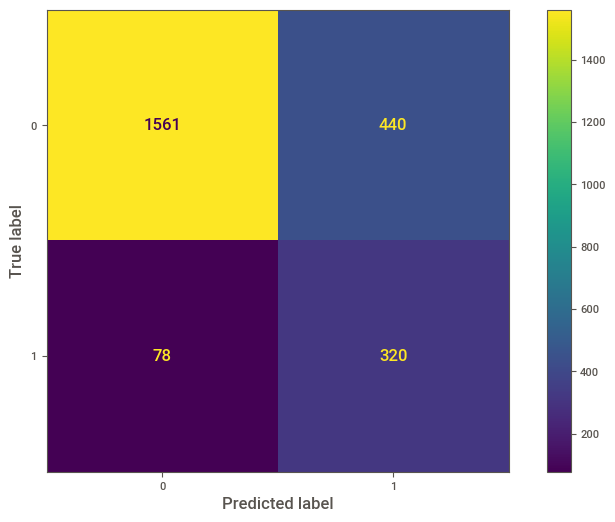

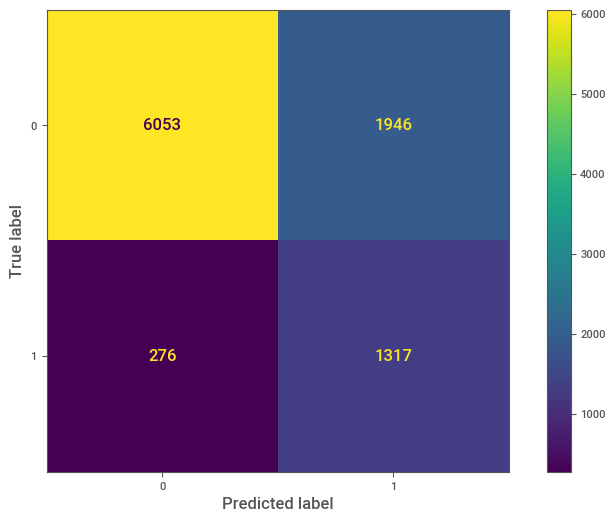

In [183]:
# checking the evaluation metrics of grid model

eval_metric(log_grid_model, X_train, y_train, X_test, y_test)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

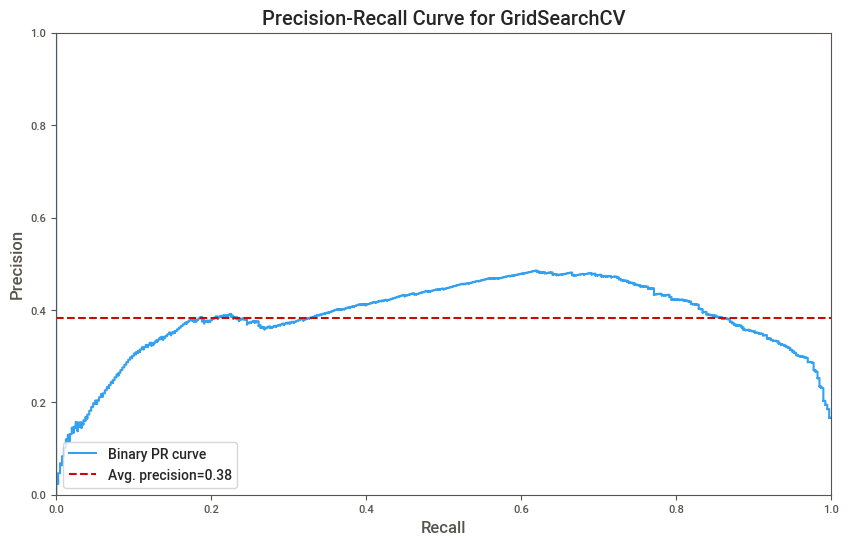

In [184]:
# Plot precision recall curve
from yellowbrick.classifier import PrecisionRecallCurve

model=log_grid_model

viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

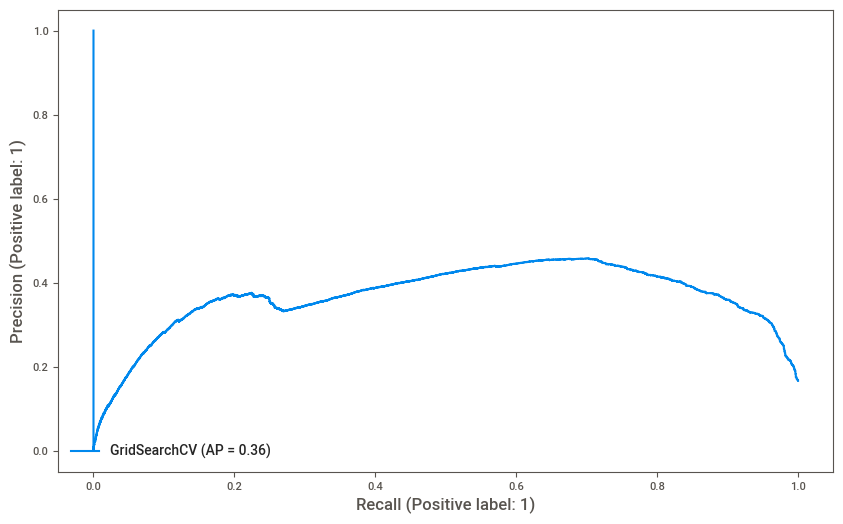

In [185]:
plot_precision_recall_curve(log_grid_model, X_train, y_train);

#### Prediction

In [186]:
# predict on train and test data

y_pred_test = log_grid_model.predict(X_test)
y_pred_train = log_grid_model.predict(X_train)

In [189]:
# define model comparison variables

log_AP = viz.score_ # AP: average precision

log_f1_test = f1_score(y_test, y_pred_test)
log_f1_train = f1_score(y_train, y_pred_train)

log_recall_test = recall_score(y_test, y_pred_test)
log_recall_train = recall_score(y_train, y_pred_train)

log_AP, log_f1_test, log_f1_train, log_recall_test, log_recall_train

(0.3826371596903859,
 0.5526770293609672,
 0.5424217462932456,
 0.8040201005025126,
 0.8267419962335216)

In [151]:
# !pip install sweetviz
# sahane bir gorsellestirme
# import sweetviz
# my_report = sweetviz.analyze([df_without_dp, "original data"],target_feat='left')
# my_report.show_notebook(layout="vertical", w ="980", h= 700, scale= .8)

### Logistic Model Building - with duplicates

In [190]:
X = df_with_dp.drop(columns="left")
y = df_with_dp.left

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [192]:
# built a pipe model for Logistic Regression with default hyperparameter

operations = [("Encoder", column_trans), ("Scaler", scaler), ("log_model", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

log_pipe_model = Pipeline(steps=operations)

In [193]:
# fit the logistic regression model on train data

log_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('log_model',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      2286
           1       0.51      0.82      0.63       714

    accuracy                           0.77      3000
   macro avg       0.72      0.79      0.73      3000
weighted avg       0.83      0.77      0.79      3000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9142
           1       0.48      0.78      0.60      2857

    accuracy                           0.75     11999
   macro avg       0.70      0.76      0.71     11999
weighted avg       0.81      0.75      0.77     11999



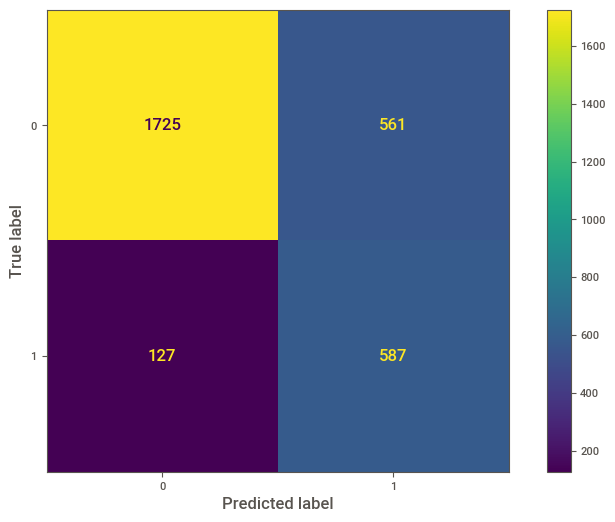

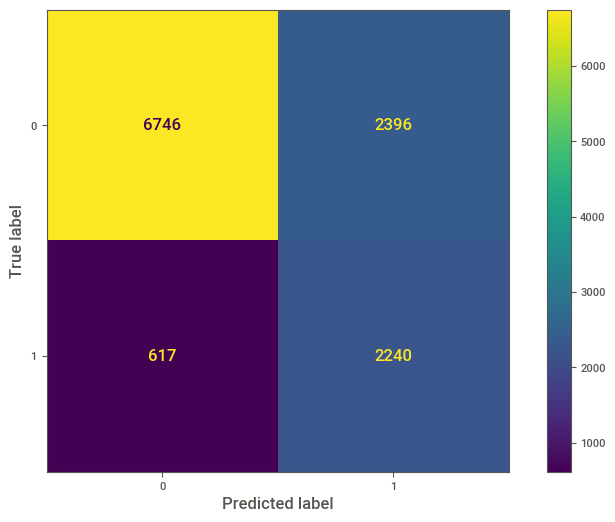

In [194]:
# check the evaluation metrics of logistic model

eval_metric(log_pipe_model, X_train, y_train, X_test, y_test)

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

#### Logistic Model Cross Validation

In [195]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_precision  train_precision  test_recall  \
1       0.04        0.01            0.50             0.48         0.81   
2       0.03        0.01            0.48             0.48         0.75   
3       0.04        0.01            0.49             0.48         0.77   
4       0.02        0.01            0.47             0.48         0.79   
5       0.03        0.01            0.47             0.48         0.76   
6       0.04        0.01            0.50             0.48         0.83   
7       0.04        0.01            0.48             0.48         0.77   
8       0.03        0.01            0.48             0.49         0.77   
9       0.03        0.01            0.49             0.48         0.83   
10      0.05        0.01            0.47             0.49         0.74   

    train_recall  test_f1  train_f1  test_accuracy  train_accuracy  
1           0.78     0.62      0.60           0.76            0.75  
2           0.79     0.58      0.60           0.74            0.75  
3           0.78     0.60      0.60           0.75            0.75  
4           0.78     0.59      0.60           0.74            0.75  
5           0.79     0.58      0.60           0.73            0.75  
6           0.78     0.62      0.60           0.76            0.75  
7           0.78     0.59      0.60           0.75            0.75  
8           0.78     0.59      0.60           0.74            0.75  
9           0.78     0.62      0.60           0.76            0.75  
10          0.79     0.57      0.60           0.74            0.75

In [196]:
df_scores.mean()[2:]

test_precision    0.48
train_precision   0.48
test_recall       0.78
train_recall      0.78
test_f1           0.60
train_f1          0.60
test_accuracy     0.75
train_accuracy    0.75
dtype: float64

#### Logistic Model GridsearchCV

In [197]:
# reset the pipe model
model = Pipeline(operations)

# defining the grid parameter
penalty = ["l1", "l2"]
C = np.logspace(-1, 2, 4)
solver = ['liblinear', 'lbfgs']

param_grid = {"log_model__penalty" : penalty,
             "log_model__C" : C,
             "log_model__solver" : solver}

# built Logistic grid model
log_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="recall", cv=5, n_jobs=-1)

In [198]:
# fit grid model on train data

log_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('Scaler', StandardScaler()),
                                       ('log_model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log_model__C': array([  0.1,   1. ,  10. , 100. ]),
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['liblinear', 'lbfgs']},
             scoring='recall')

In [199]:
log_grid_model.best_estimator_

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('log_model',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101, solver='liblinear'))])

In [200]:
log_grid_model.best_params_

{'log_model__C': 1.0,
 'log_model__penalty': 'l2',
 'log_model__solver': 'liblinear'}

In [201]:
log_grid_model.best_score_

0.7836919647777792

TEST REPORT
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      2286
           1       0.51      0.82      0.63       714

    accuracy                           0.77      3000
   macro avg       0.72      0.79      0.73      3000
weighted avg       0.83      0.77      0.79      3000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9142
           1       0.48      0.78      0.60      2857

    accuracy                           0.75     11999
   macro avg       0.70      0.76      0.71     11999
weighted avg       0.81      0.75      0.77     11999



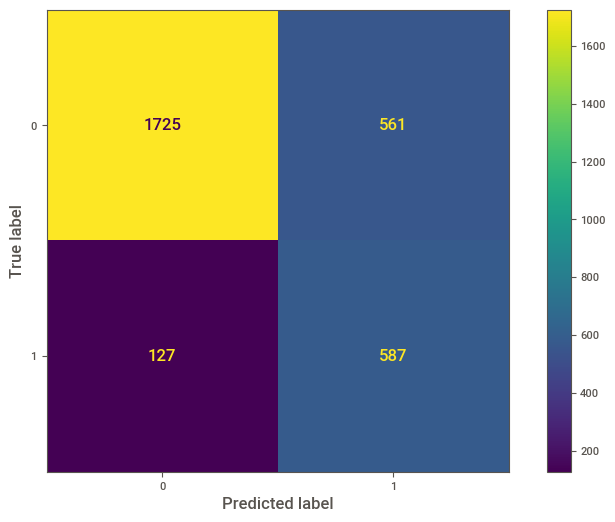

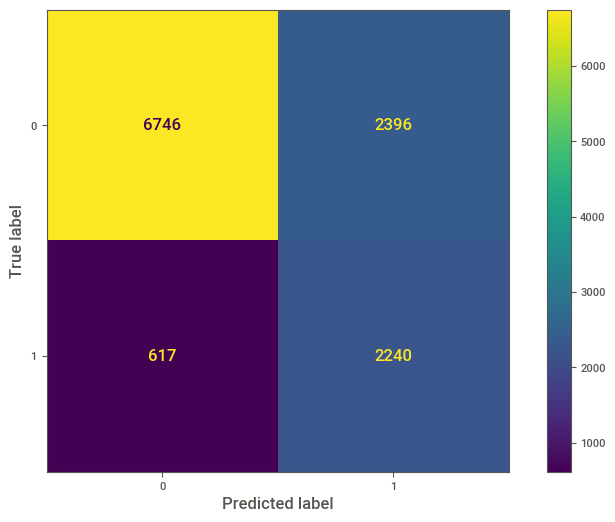

In [202]:
# checking the evaluation metrics of grid model

eval_metric(log_grid_model, X_train, y_train, X_test, y_test)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

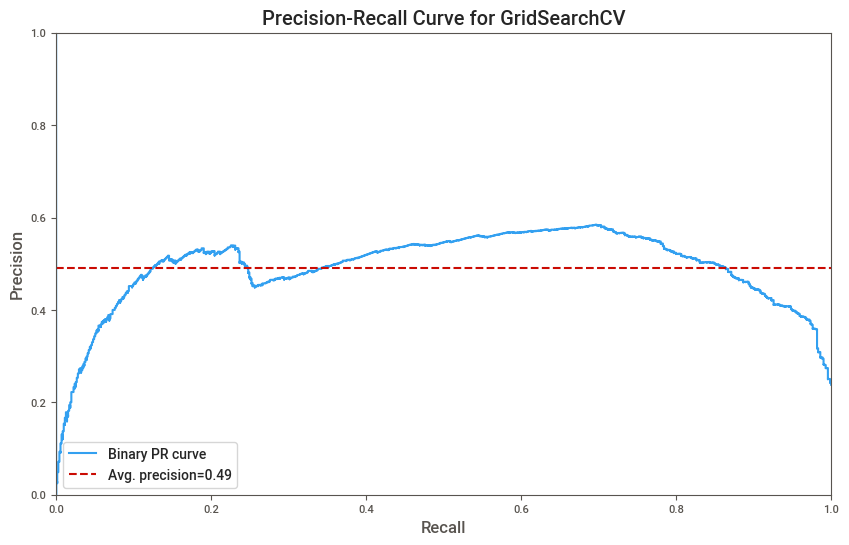

In [203]:
# Plot precision recall curve
from yellowbrick.classifier import PrecisionRecallCurve

model=log_grid_model

viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

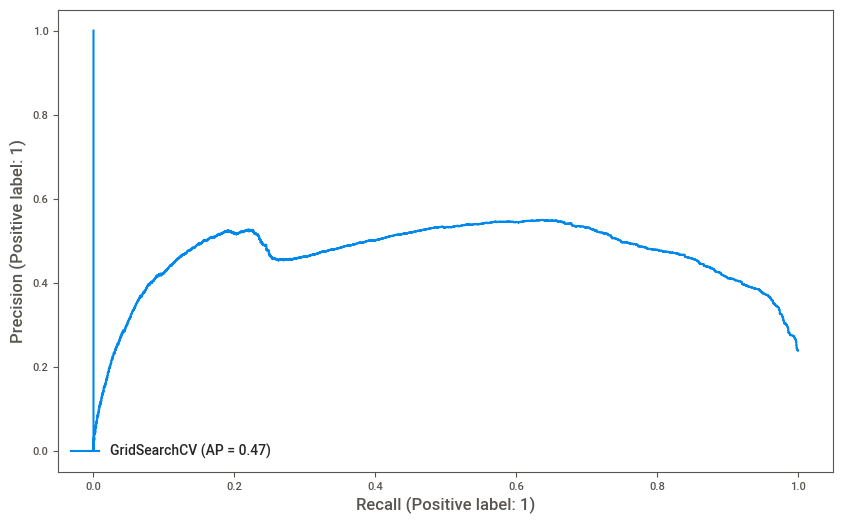

In [204]:
plot_precision_recall_curve(log_grid_model, X_train, y_train);

#### Prediction

In [205]:
# predict on train and test data

y_pred_test = log_grid_model.predict(X_test)
y_pred_train = log_grid_model.predict(X_train)

In [206]:
# define model comparison variables

log_AP = viz.score_ # AP: average precision

log_f1_test = f1_score(y_test, y_pred_test)
log_f1_train = f1_score(y_train, y_pred_train)

log_recall_test = recall_score(y_test, y_pred_test)
log_recall_train = recall_score(y_train, y_pred_train)

log_AP, log_f1_test, log_f1_train, log_recall_test, log_recall_train

(0.49063820961153776,
 0.6305048335123523,
 0.597891365274256,
 0.8221288515406162,
 0.784039201960098)

### SVC Model- without duplicates

In [220]:
X = df_without_dp.drop(columns="left")
y = df_without_dp.left

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [222]:
# built a pipe model for Logistic Regression with default hyperparameter

operations = [("Encoder", column_trans), ("Scaler", scaler), ("SVC_model", SVC(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

SVC_pipe_model = Pipeline(steps=operations)

In [223]:
# fit the logistic regression model on train data

SVC_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('SVC_model',
                 SVC(class_weight='balanced', max_iter=10000,
                     random_state=101))])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2001
           1       0.75      0.93      0.83       398

    accuracy                           0.94      2399
   macro avg       0.87      0.94      0.90      2399
weighted avg       0.95      0.94      0.94      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      7999
           1       0.79      0.93      0.85      1593

    accuracy                           0.95      9592
   macro avg       0.89      0.94      0.91      9592
weighted avg       0.95      0.95      0.95      9592



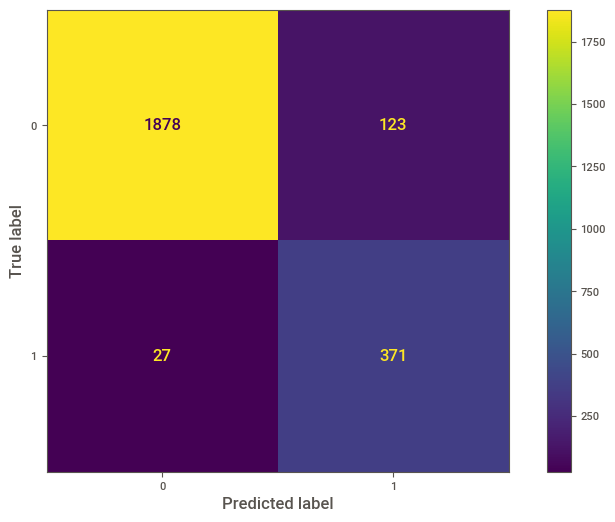

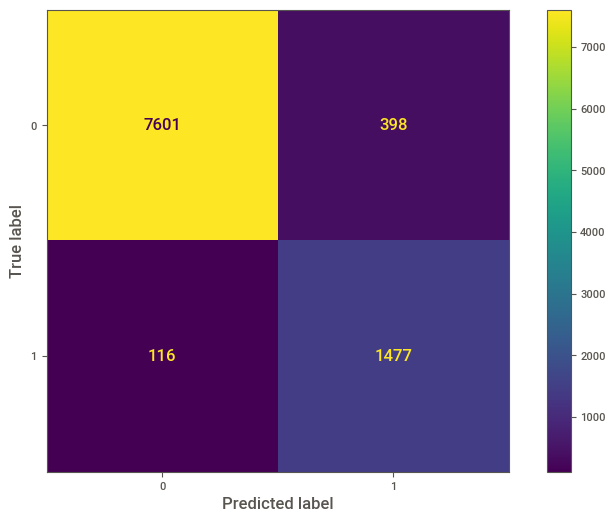

In [224]:
# check the evaluation metrics of logistic model

eval_metric(SVC_pipe_model, X_train, y_train, X_test, y_test)

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

#### SVC Model Cross Validation

In [225]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_precision  train_precision  test_recall  \
1       1.15        0.25            0.76             0.79         0.91   
2       1.18        0.19            0.78             0.79         0.89   
3       1.28        0.21            0.77             0.79         0.90   
4       1.17        0.24            0.79             0.78         0.93   
5       1.24        0.21            0.76             0.79         0.94   
6       1.27        0.20            0.77             0.79         0.92   
7       1.28        0.17            0.76             0.78         0.94   
8       1.18        0.22            0.81             0.78         0.92   
9       1.15        0.22            0.76             0.79         0.92   
10      1.11        0.21            0.74             0.79         0.90   

    train_recall  test_f1  train_f1  test_accuracy  train_accuracy  
1           0.93     0.83      0.85           0.94            0.95  
2           0.93     0.83      0.85           0.94            0.95  
3           0.93     0.83      0.85           0.94            0.95  
4           0.93     0.86      0.85           0.95            0.95  
5           0.93     0.84      0.85           0.94            0.95  
6           0.93     0.84      0.85           0.94            0.95  
7           0.93     0.84      0.85           0.94            0.95  
8           0.93     0.86      0.85           0.95            0.95  
9           0.93     0.83      0.85           0.94            0.95  
10          0.93     0.81      0.85           0.93            0.95

In [226]:
df_scores.mean()[2:]

test_precision    0.77
train_precision   0.79
test_recall       0.92
train_recall      0.93
test_f1           0.84
train_f1          0.85
test_accuracy     0.94
train_accuracy    0.95
dtype: float64

#### SVC Model GridsearchCV

In [237]:
# reset the pipe model
operations = [("Encoder", column_trans), ("Scaler", scaler), ("SVC", SVC(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]
model = Pipeline(operations)

# defining the grid parameter
param_grid = {'SVC__C': [0.01, 0.1, 1, 5],
              'SVC__gamma': ["scale", "auto", 1, 0.1, 0.01]
             }

# built SVC grid model
SVC_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="recall", cv=5, n_jobs=-1)

In [238]:
# fit grid model on train data

SVC_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('Scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            max_iter=10000,
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.01, 0.1, 1, 5],
                         'SVC__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring='recall')

In [239]:
SVC_grid_model.best_estimator_

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('SVC',
                 SVC(C=0.1, class_weight='balanced', gamma=0.01, max_iter=10000,
                     random_state=101))])

In [240]:
SVC_grid_model.best_params_

{'SVC__C': 0.1, 'SVC__gamma': 0.01}

In [241]:
SVC_grid_model.best_score_

0.9422566589775438

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      2001
           1       0.51      0.94      0.66       398

    accuracy                           0.84      2399
   macro avg       0.75      0.88      0.78      2399
weighted avg       0.91      0.84      0.86      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.80      0.88      7999
           1       0.48      0.94      0.64      1593

    accuracy                           0.82      9592
   macro avg       0.73      0.87      0.76      9592
weighted avg       0.90      0.82      0.84      9592



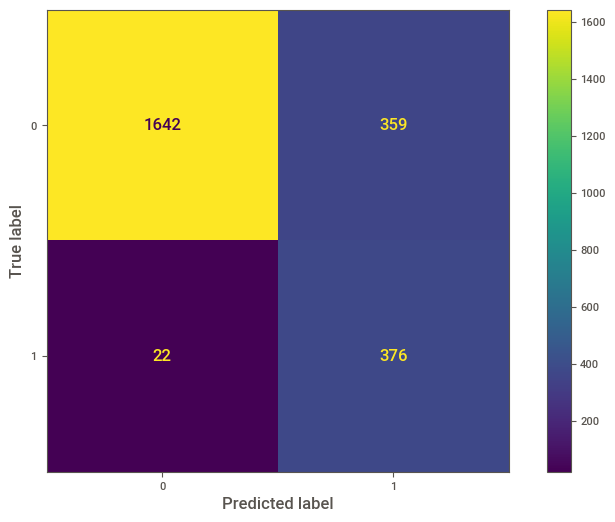

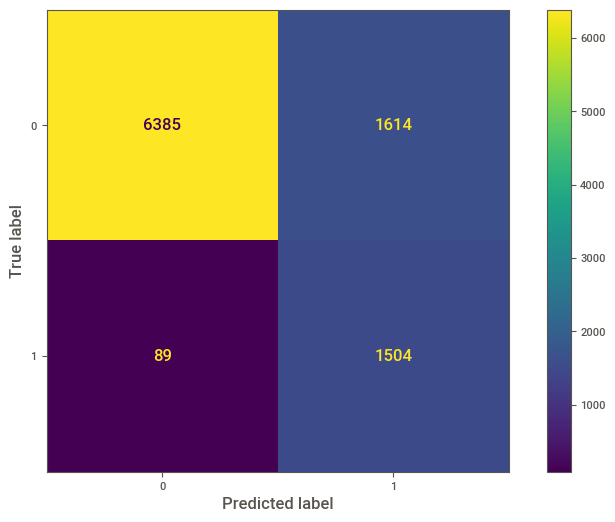

In [242]:
# checking the evaluation metrics of grid model

eval_metric(SVC_grid_model, X_train, y_train, X_test, y_test)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

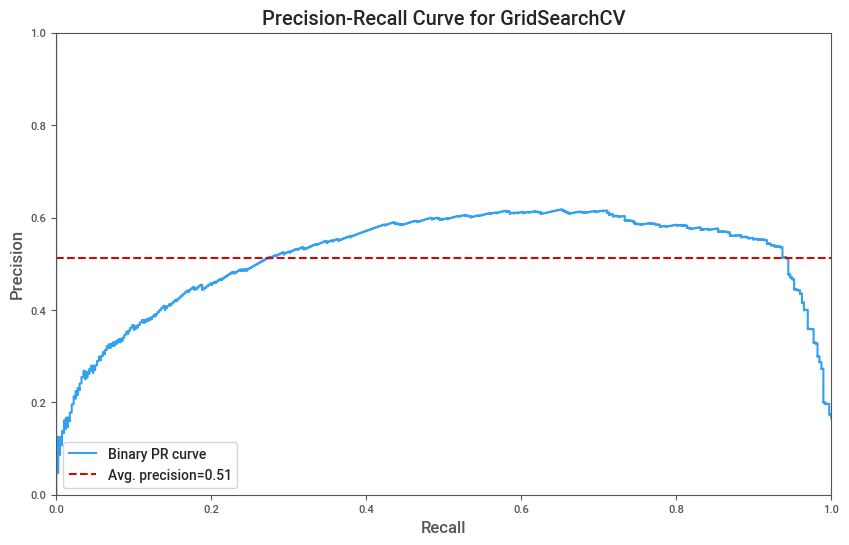

In [243]:
# Plot precision recall curve
from yellowbrick.classifier import PrecisionRecallCurve

model=SVC_grid_model

viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

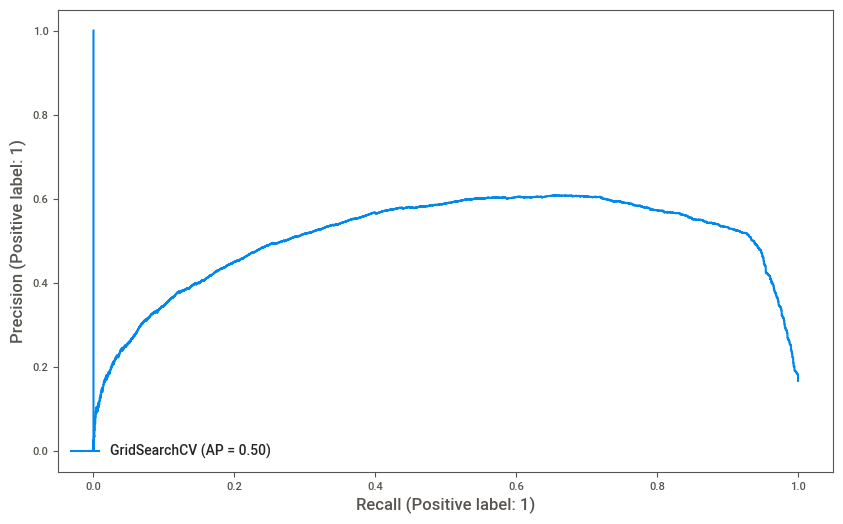

In [244]:
plot_precision_recall_curve(SVC_grid_model, X_train, y_train);

#### Prediction

In [245]:
# predict on train and test data

y_pred_test = SVC_grid_model.predict(X_test)
y_pred_train = SVC_grid_model.predict(X_train)

In [246]:
# define model comparison variables

SVC_AP = viz.score_ # AP: average precision

SVC_f1_test = f1_score(y_test, y_pred_test)
SVC_f1_train = f1_score(y_train, y_pred_train)

SVC_recall_test = recall_score(y_test, y_pred_test)
SVC_recall_train = recall_score(y_train, y_pred_train)

SVC_AP, SVC_f1_test, SVC_f1_train, SVC_recall_test, SVC_recall_train

(0.5129689368712189,
 0.6637246248896734,
 0.6385056251326683,
 0.9447236180904522,
 0.9441305712492153)

In [ ]:
# !pip install scikit-plot -q
# import scikitplot as skplt

In [250]:
# from sklearn.calibration import CalibratedClassifierCV

# calibrated_svc = CalibratedClassifierCV(
#     # base_estimator=LinearSVC(C=0.05, class_weight='balanced', random_state=random_state),
#     base_estimator=SVC_grid_model, 
#     method='sigmoid',
#     cv=5, 
# )
# calibrated_svc.fit(X_train, y_train)

# y_probas = calibrated_svc.predict_proba(X_test)
# skplt.metrics.plot_precision_recall(y_test, y_probas)
# plt.show()

### SVC Model - with duplicates

In [251]:
X = df_with_dp.drop(columns="left")
y = df_with_dp.left

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [253]:
# built a pipe model for Logistic Regression with default hyperparameter

operations = [("Encoder", column_trans), ("Scaler", scaler), ("SVC_model", SVC(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

SVC_pipe_model = Pipeline(steps=operations)

In [254]:
# fit the logistic regression model on train data

SVC_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('SVC_model',
                 SVC(class_weight='balanced', max_iter=10000,
                     random_state=101))])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2286
           1       0.84      0.94      0.88       714

    accuracy                           0.94      3000
   macro avg       0.91      0.94      0.92      3000
weighted avg       0.95      0.94      0.94      3000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      9142
           1       0.86      0.93      0.89      2857

    accuracy                           0.95     11999
   macro avg       0.92      0.94      0.93     11999
weighted avg       0.95      0.95      0.95     11999



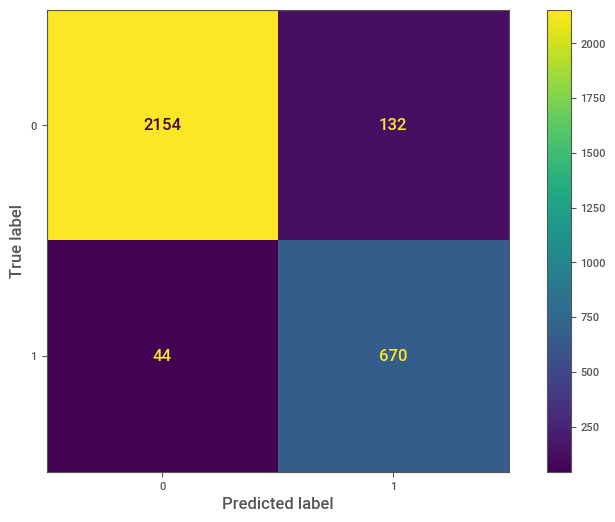

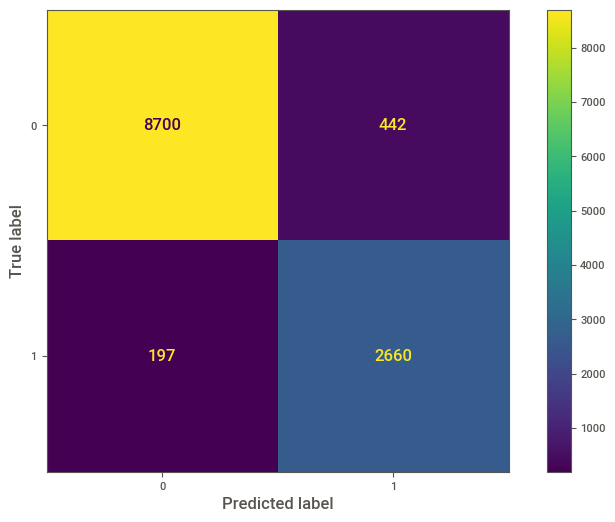

In [255]:
# check the evaluation metrics of logistic model

eval_metric(SVC_pipe_model, X_train, y_train, X_test, y_test)

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

#### SVC Model Cross Validation

In [256]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_precision  train_precision  test_recall  \
1       1.87        0.29            0.88             0.85         0.94   
2       1.83        0.32            0.83             0.86         0.91   
3       1.84        0.32            0.85             0.86         0.93   
4       1.86        0.41            0.83             0.86         0.94   
5       1.96        0.41            0.84             0.86         0.89   
6       1.98        0.35            0.86             0.85         0.92   
7       1.91        0.30            0.84             0.86         0.93   
8       1.87        0.32            0.85             0.86         0.92   
9       1.81        0.34            0.85             0.85         0.93   
10      1.87        0.36            0.84             0.86         0.92   

    train_recall  test_f1  train_f1  test_accuracy  train_accuracy  
1           0.93     0.91      0.89           0.95            0.94  
2           0.93     0.87      0.89           0.94            0.95  
3           0.93     0.89      0.89           0.94            0.95  
4           0.93     0.88      0.89           0.94            0.95  
5           0.93     0.87      0.89           0.94            0.95  
6           0.93     0.89      0.89           0.94            0.95  
7           0.93     0.88      0.89           0.94            0.95  
8           0.93     0.89      0.89           0.94            0.95  
9           0.93     0.88      0.89           0.94            0.95  
10          0.93     0.87      0.89           0.94            0.95

In [257]:
df_scores.mean()[2:]

test_precision    0.85
train_precision   0.86
test_recall       0.92
train_recall      0.93
test_f1           0.88
train_f1          0.89
test_accuracy     0.94
train_accuracy    0.95
dtype: float64

#### SVC Model GridsearchCV

In [269]:
# reset the pipe model
operations = [("Encoder", column_trans), ("Scaler", scaler), ("SVC", SVC(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]
model = Pipeline(operations)

# defining the grid parameter
param_grid = {'SVC__C': [0.01, 0.1, 1],
              'SVC__gamma': ["scale", "auto", 1, 0.1, 0.01]
             }

# built SVC grid model
SVC_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="recall", cv=5, n_jobs=-1)

In [270]:
# fit grid model on train data

SVC_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('Scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            max_iter=10000,
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.01, 0.1, 1],
                         'SVC__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring='recall')

In [271]:
SVC_grid_model.best_estimator_

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('SVC',
                 SVC(C=1, class_weight='balanced', gamma=1, max_iter=10000,
                     random_state=101))])

In [272]:
SVC_grid_model.best_params_

{'SVC__C': 1, 'SVC__gamma': 1}

In [273]:
SVC_grid_model.best_score_

0.9464532840189583

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.95      0.95      0.95       714

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9142
           1       0.98      0.99      0.98      2857

    accuracy                           0.99     11999
   macro avg       0.99      0.99      0.99     11999
weighted avg       0.99      0.99      0.99     11999



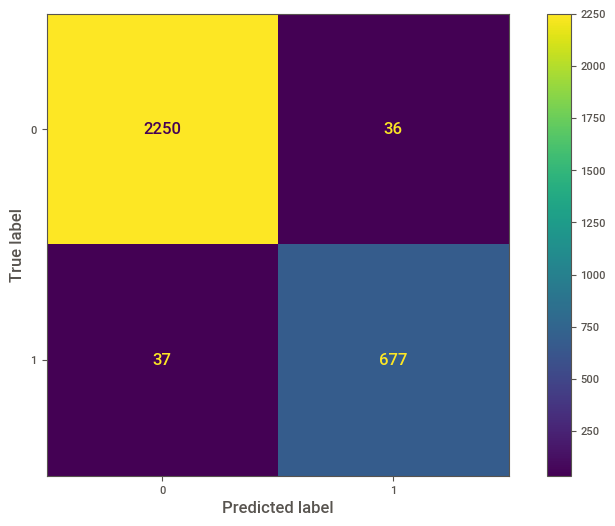

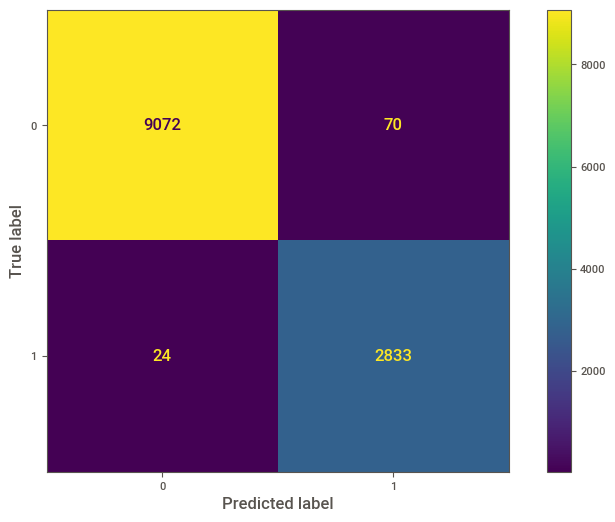

In [274]:
# checking the evaluation metrics of grid model

eval_metric(SVC_grid_model, X_train, y_train, X_test, y_test)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

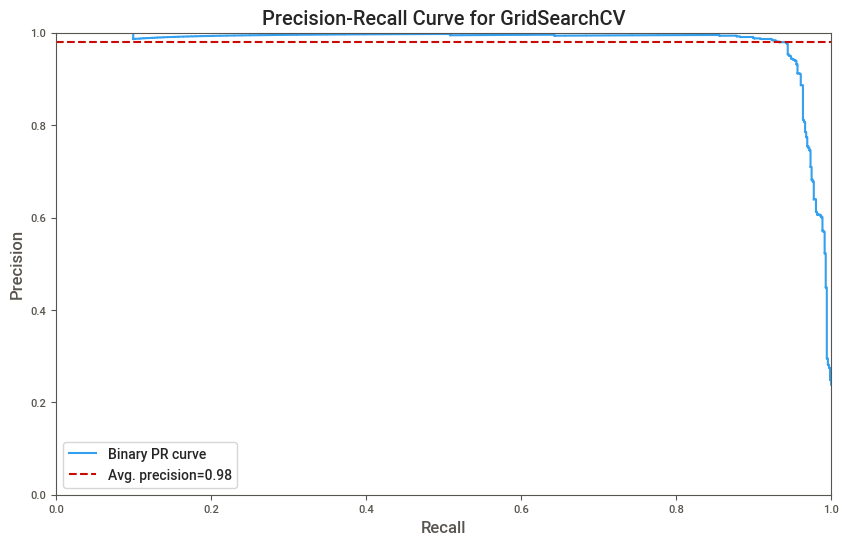

In [275]:
# Plot precision recall curve
from yellowbrick.classifier import PrecisionRecallCurve

model=SVC_grid_model

viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

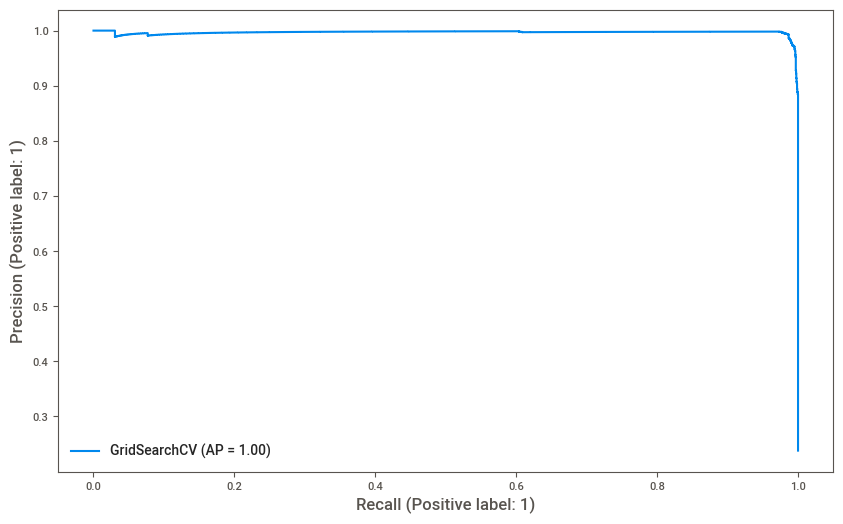

In [276]:
plot_precision_recall_curve(SVC_grid_model, X_train, y_train);

#### Prediction

In [277]:
# predict on train and test data

y_pred_test = SVC_grid_model.predict(X_test)
y_pred_train = SVC_grid_model.predict(X_train)

In [278]:
# define model comparison variables

SVC_AP = viz.score_ # AP: average precision

SVC_f1_test = f1_score(y_test, y_pred_test)
SVC_f1_train = f1_score(y_train, y_pred_train)

SVC_recall_test = recall_score(y_test, y_pred_test)
SVC_recall_train = recall_score(y_train, y_pred_train)

SVC_AP, SVC_f1_test, SVC_f1_train, SVC_recall_test, SVC_recall_train

(0.9789260696594247,
 0.948843728100911,
 0.9836805555555556,
 0.9481792717086834,
 0.991599579978999)

### KNN Model - without duplicates

In [220]:
X = df_without_dp.drop(columns="left")
y = df_without_dp.left

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [280]:
# define class weights in order to use during model fit, as we have imbalanced data

from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.65625684, 2.09993   ])

In [284]:
# built a pipe model for Logistic Regression with default hyperparameter

operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier())]

KNN_pipe_model = Pipeline(steps=operations)

In [287]:
# fit the logistic regression model on train data

KNN_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('KNN_model', KNeighborsClassifier())])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2286
           1       0.85      0.93      0.89       714

    accuracy                           0.94      3000
   macro avg       0.91      0.94      0.93      3000
weighted avg       0.95      0.94      0.94      3000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      9142
           1       0.91      0.95      0.93      2857

    accuracy                           0.96     11999
   macro avg       0.94      0.96      0.95     11999
weighted avg       0.97      0.96      0.96     11999



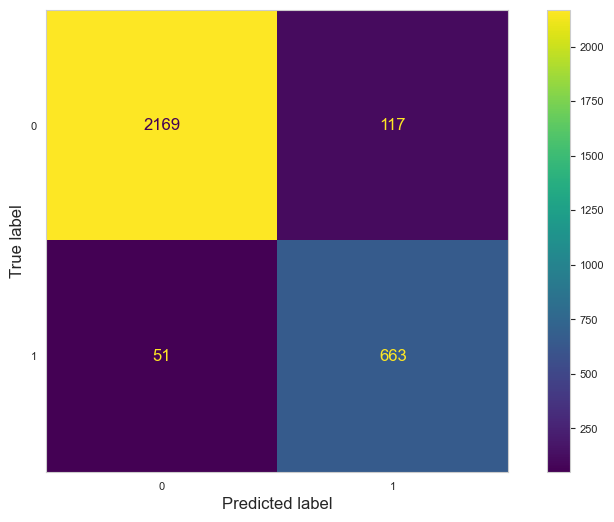

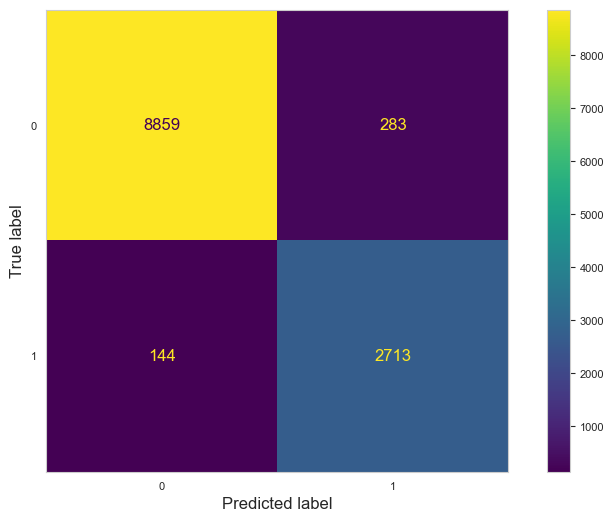

In [288]:
# check the evaluation metrics of logistic model

eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

#### KNN Model Cross Validation

In [289]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_precision  train_precision  test_recall  \
1       0.02        0.11            0.87             0.90         0.94   
2       0.01        0.08            0.86             0.90         0.87   
3       0.02        0.09            0.85             0.90         0.88   
4       0.01        0.09            0.84             0.90         0.92   
5       0.01        0.11            0.84             0.91         0.87   
6       0.01        0.09            0.86             0.91         0.89   
7       0.02        0.10            0.86             0.91         0.89   
8       0.02        0.12            0.86             0.90         0.91   
9       0.01        0.09            0.86             0.90         0.92   
10      0.01        0.12            0.85             0.91         0.88   

    train_recall  test_f1  train_f1  test_accuracy  train_accuracy  
1           0.94     0.90      0.92           0.95            0.96  
2           0.94     0.87      0.92           0.94            0.96  
3           0.94     0.86      0.92           0.93            0.96  
4           0.94     0.88      0.92           0.94            0.96  
5           0.94     0.86      0.92           0.93            0.96  
6           0.94     0.88      0.92           0.94            0.96  
7           0.94     0.87      0.93           0.94            0.96  
8           0.94     0.88      0.92           0.94            0.96  
9           0.94     0.89      0.92           0.94            0.96  
10          0.94     0.87      0.92           0.94            0.96

In [290]:
df_scores.mean()[2:]

test_precision    0.86
train_precision   0.90
test_recall       0.90
train_recall      0.94
test_f1           0.88
train_f1          0.92
test_accuracy     0.94
train_accuracy    0.96
dtype: float64

#### KNN Model GridsearchCV

In [298]:
# reset the pipe model
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN", KNeighborsClassifier())]
model = Pipeline(operations)

# defining the grid parameter
k_values=[5, 8, 10, 15]

param_grid = {'KNN__n_neighbors': k_values,
              'KNN__p': [1,2],
              'KNN__weights': ['uniform', "distance"]
             }

# built KNN grid model
KNN_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="recall", cv=5, n_jobs=-1)

In [299]:
# fit grid model on train data

KNN_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('Scaler', StandardScaler()),
                                       ('KNN', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'KNN__n_neighbors': [5, 8, 10, 15], 'KNN__p': [1, 2],
                         'KNN__weights': ['uniform', 'distance']},
             scoring='recall')

In [300]:
KNN_grid_model.best_estimator_

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('KNN',
                 KNeighborsClassifier(n_neighbors=15, p=1,
                                      weights='distance'))])

In [295]:
KNN_grid_model.best_params_

{'KNN__n_neighbors': 8, 'KNN__p': 1, 'KNN__weights': 'distance'}

In [296]:
KNN_grid_model.best_score_

0.9629033838315799

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2286
           1       0.88      0.97      0.92       714

    accuracy                           0.96      3000
   macro avg       0.94      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9142
           1       1.00      1.00      1.00      2857

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



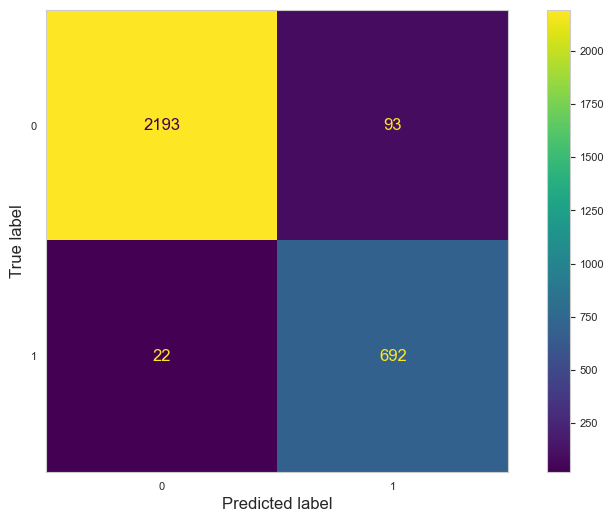

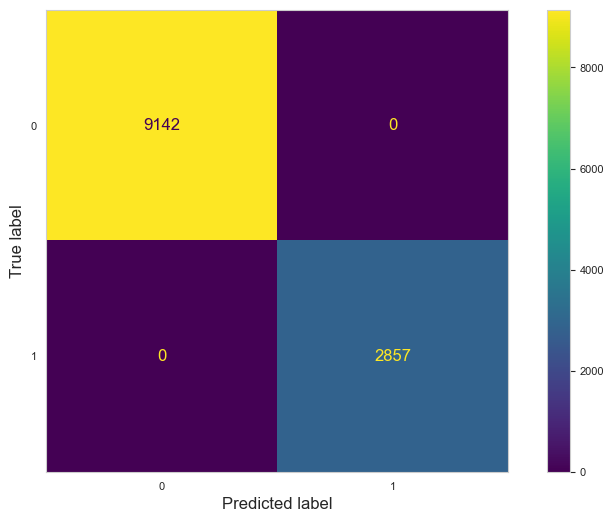

In [297]:
# checking the evaluation metrics of grid model

eval_metric(KNN_grid_model, X_train, y_train, X_test, y_test)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

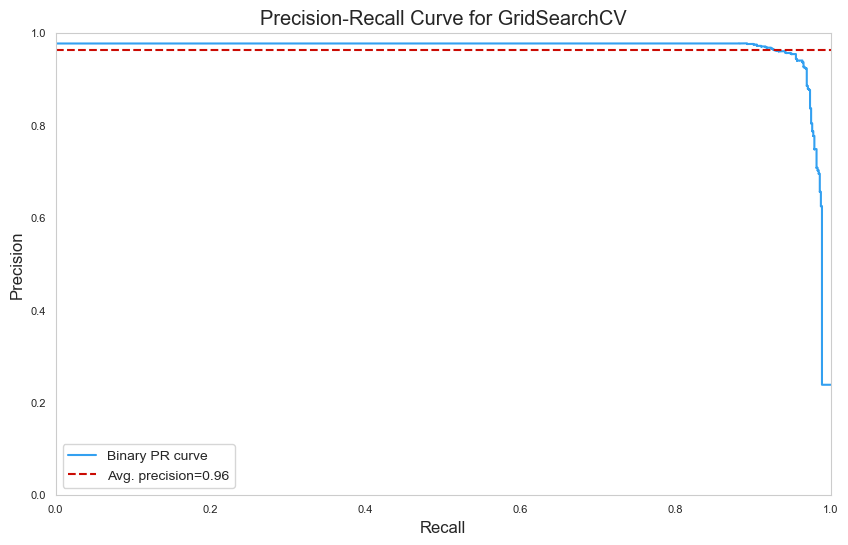

In [301]:
# Plot precision recall curve
from yellowbrick.classifier import PrecisionRecallCurve

model=KNN_grid_model

viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

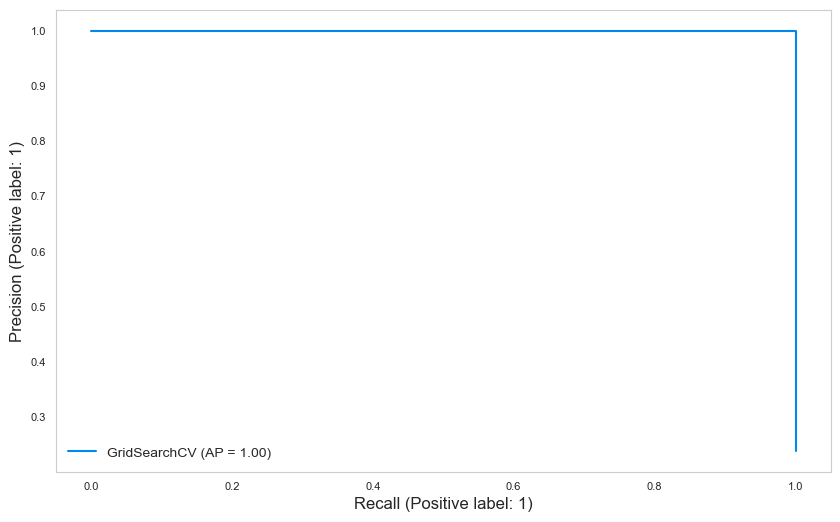

In [302]:
plot_precision_recall_curve(KNN_grid_model, X_train, y_train);

#### Prediction

In [245]:
# predict on train and test data

y_pred_test = KNN_grid_model.predict(X_test)
y_pred_train = KNN_grid_model.predict(X_train)

In [246]:
# define model comparison variables

KNN_AP = viz.score_ # AP: average precision

KNN_f1_test = f1_score(y_test, y_pred_test)
KNN_f1_train = f1_score(y_train, y_pred_train)

KNN_recall_test = recall_score(y_test, y_pred_test)
KNN_recall_train = recall_score(y_train, y_pred_train)

KNN_AP, KNN_f1_test, KNN_f1_train, KNN_recall_test, KNN_recall_train

(0.5129689368712189,
 0.6637246248896734,
 0.6385056251326683,
 0.9447236180904522,
 0.9441305712492153)

### KNN Model - with duplicates

In [303]:
X = df_with_dp.drop(columns="left")
y = df_with_dp.left

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [305]:
# built a pipe model for Logistic Regression with default hyperparameter

operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier())]

KNN_pipe_model = Pipeline(steps=operations)

In [306]:
# fit the logistic regression model on train data

KNN_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('KNN_model', KNeighborsClassifier())])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2286
           1       0.85      0.93      0.89       714

    accuracy                           0.94      3000
   macro avg       0.91      0.94      0.93      3000
weighted avg       0.95      0.94      0.94      3000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      9142
           1       0.91      0.95      0.93      2857

    accuracy                           0.96     11999
   macro avg       0.94      0.96      0.95     11999
weighted avg       0.97      0.96      0.96     11999



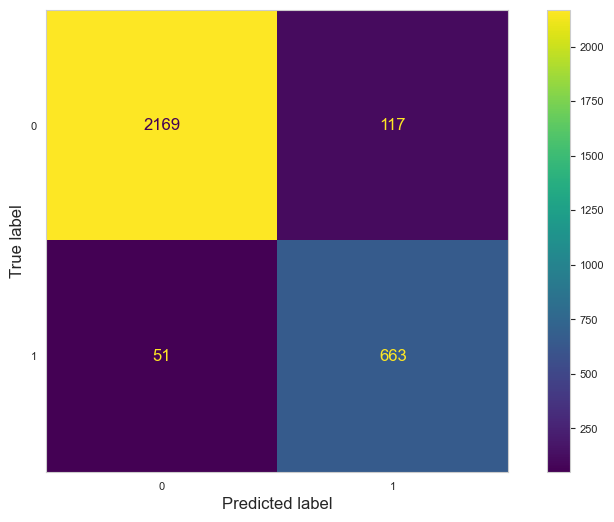

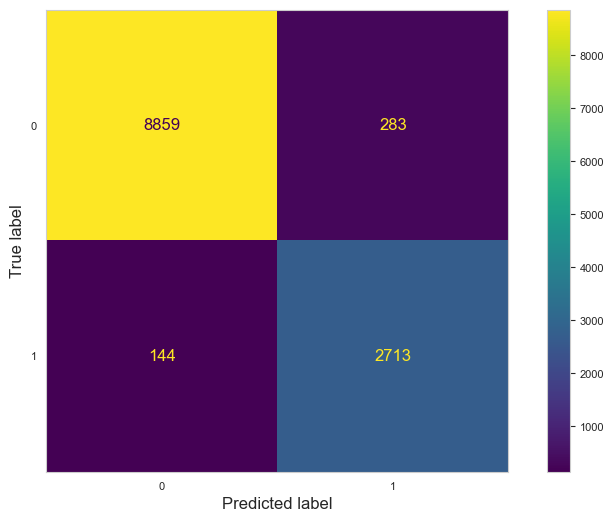

In [307]:
# check the evaluation metrics of logistic model

eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

#### KNN Model Cross Validation

In [308]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_precision  train_precision  test_recall  \
1       0.02        0.09            0.87             0.90         0.94   
2       0.02        0.09            0.86             0.90         0.87   
3       0.02        0.08            0.85             0.90         0.88   
4       0.02        0.09            0.84             0.90         0.92   
5       0.02        0.08            0.84             0.91         0.87   
6       0.02        0.09            0.86             0.91         0.89   
7       0.02        0.08            0.86             0.91         0.89   
8       0.02        0.08            0.86             0.90         0.91   
9       0.02        0.08            0.86             0.90         0.92   
10      0.02        0.08            0.85             0.91         0.88   

    train_recall  test_f1  train_f1  test_accuracy  train_accuracy  
1           0.94     0.90      0.92           0.95            0.96  
2           0.94     0.87      0.92           0.94            0.96  
3           0.94     0.86      0.92           0.93            0.96  
4           0.94     0.88      0.92           0.94            0.96  
5           0.94     0.86      0.92           0.93            0.96  
6           0.94     0.88      0.92           0.94            0.96  
7           0.94     0.87      0.93           0.94            0.96  
8           0.94     0.88      0.92           0.94            0.96  
9           0.94     0.89      0.92           0.94            0.96  
10          0.94     0.87      0.92           0.94            0.96

In [309]:
df_scores.mean()[2:]

test_precision    0.86
train_precision   0.90
test_recall       0.90
train_recall      0.94
test_f1           0.88
train_f1          0.92
test_accuracy     0.94
train_accuracy    0.96
dtype: float64

#### KNN Model GridsearchCV

In [310]:
# reset the pipe model
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN", KNeighborsClassifier())]
model = Pipeline(operations)

# defining the grid parameter
k_values=[5, 8, 10, 15]

param_grid = {'KNN__n_neighbors': k_values,
              'KNN__p': [1,2],
              'KNN__weights': ['uniform', "distance"]
             }

# built KNN grid model
KNN_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="recall", cv=5, n_jobs=-1)

In [311]:
# fit grid model on train data

KNN_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('Scaler', StandardScaler()),
                                       ('KNN', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'KNN__n_neighbors': [5, 8, 10, 15], 'KNN__p': [1, 2],
                         'KNN__weights': ['uniform', 'distance']},
             scoring='recall')

In [312]:
KNN_grid_model.best_estimator_

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('KNN',
                 KNeighborsClassifier(n_neighbors=15, p=1,
                                      weights='distance'))])

In [313]:
KNN_grid_model.best_params_

{'KNN__n_neighbors': 15, 'KNN__p': 1, 'KNN__weights': 'distance'}

In [314]:
KNN_grid_model.best_score_

0.9636014598361358

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2286
           1       0.89      0.97      0.93       714

    accuracy                           0.96      3000
   macro avg       0.94      0.97      0.95      3000
weighted avg       0.97      0.96      0.96      3000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9142
           1       1.00      1.00      1.00      2857

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



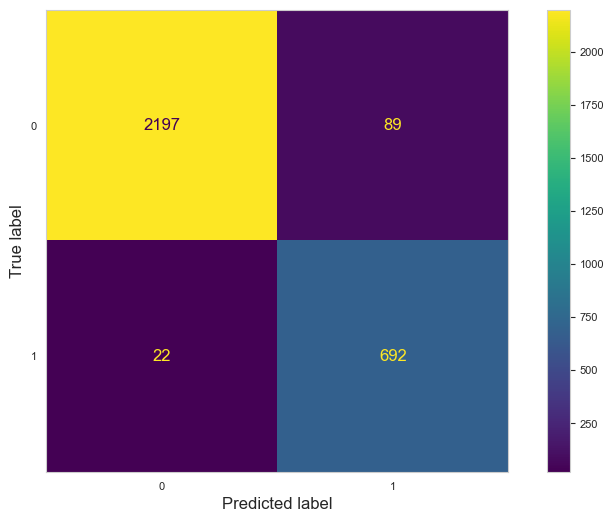

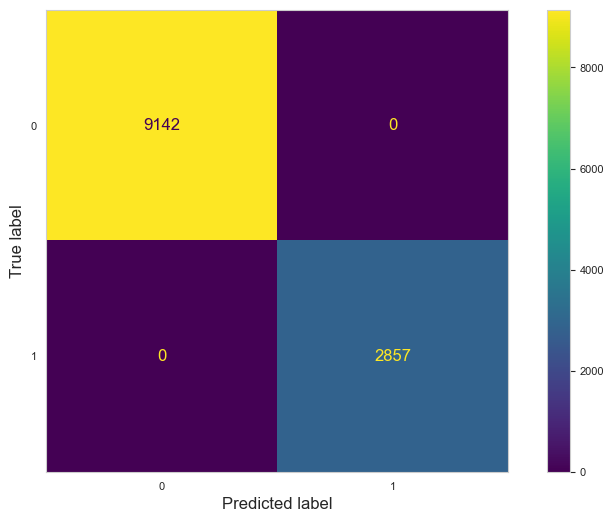

In [315]:
# checking the evaluation metrics of grid model

eval_metric(KNN_grid_model, X_train, y_train, X_test, y_test)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

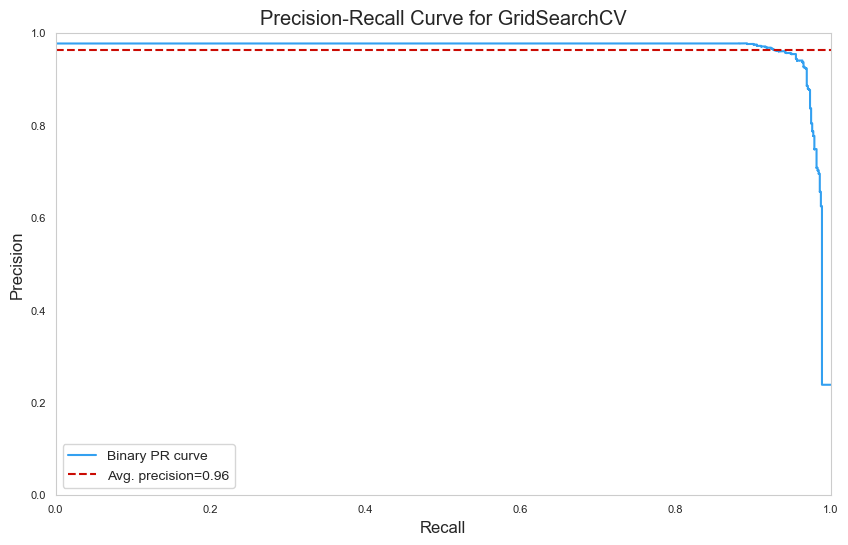

In [316]:
# Plot precision recall curve
from yellowbrick.classifier import PrecisionRecallCurve

model=KNN_grid_model

viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

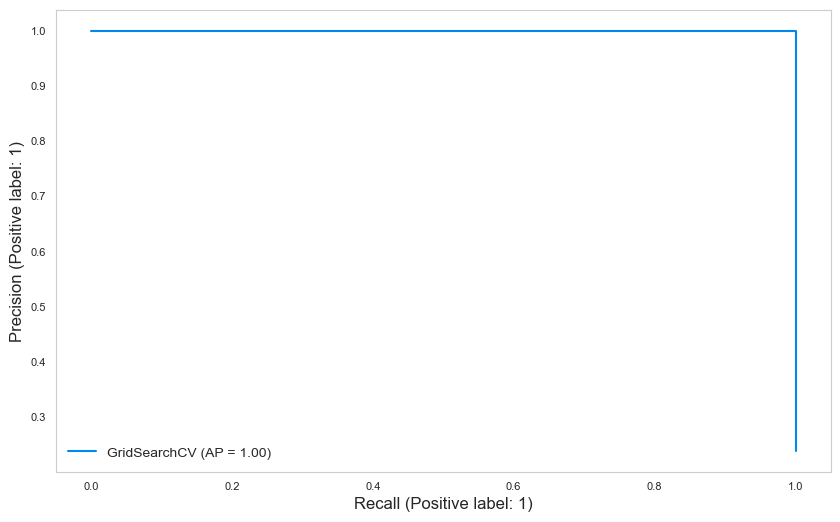

In [317]:
plot_precision_recall_curve(KNN_grid_model, X_train, y_train);

#### Prediction

In [318]:
# predict on train and test data

y_pred_test = KNN_grid_model.predict(X_test)
y_pred_train = KNN_grid_model.predict(X_train)

In [319]:
# define model comparison variables

KNN_AP = viz.score_ # AP: average precision

KNN_f1_test = f1_score(y_test, y_pred_test)
KNN_f1_train = f1_score(y_train, y_pred_train)

KNN_recall_test = recall_score(y_test, y_pred_test)
KNN_recall_train = recall_score(y_train, y_pred_train)

KNN_AP, KNN_f1_test, KNN_f1_train, KNN_recall_test, KNN_recall_train

(0.9629665581845167, 0.9257525083612042, 1.0, 0.969187675070028, 1.0)

### Random Forest Classifier

#### Model Building

#### Evaluating Model Performance and Tuning

#### Prediction

### #XGBoost Classifier

#### Model Building

#### Evaluating Model Performance and Tuning

#### Prediction

### #ANN Classifier

#### Layer Architecture Building and Compiling

#### Evaluating Model Performance and Tunning

#### Prediction

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model

### Save and Export Variables


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___